## Data Prep

**Import necessary modules and the ASOS/SNOTEL dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dtb
import os
from glob import glob
import datetime as dt
import seaborn as sns

In [2]:
data = [pd.read_csv('asos_snotel_UA_df.dat', parse_dates = True, index_col = 'Date_Time')]
asos_snotel_UA_df = pd.concat(data)
pd.set_option('display.expand_frame_repr', True)
print(asos_snotel_UA_df.keys())

#delete empty columns as they mess up loops
#del asos_snotel_UA_df['CMtn_6hr_Precipitation_mm']            #empty column


Index(['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC',
       'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps',
       'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm',
       'LXV_Temperature_degC', 'LXV_Dewpoint_degC',
       ...
       'KDEN_d850_700_height_m', 'KDEN_d850_700_tmpc', 'KDEN_d850_700_dwpc',
       'KDEN_d850_700_drct', 'KDEN_d850_700_speed_kts',
       'KDEN_d700_250_height_m', 'KDEN_d700_250_tmpc', 'KDEN_d700_250_dwpc',
       'KDEN_d700_250_drct', 'KDEN_d700_250_speed_kts'],
      dtype='object', length=106)


### Create 12 hr snowfall dataframe by using 12hr snowdepth difference

In [3]:
fig = plt.figure(figsize=(10,5))

#Calculate 12-snowfall column by finding difference between 12-hr snow depth observations 
asos_snotel_UA_df['CMtnSNTL_12hr_SNWD_in'] = asos_snotel_UA_df['CMtnSNTL_SnowDepth_in'].resample('12H').last()
asos_snotel_UA_df['CMtnSNTL_12hr-dSNWD_in'] = asos_snotel_UA_df['CMtnSNTL_12hr_SNWD_in']-asos_snotel_UA_df['CMtnSNTL_12hr_SNWD_in'].shift(+12)
asos_snotel_UA_df['CMtnSNTL_12hr-SNOWFALL_in'] = asos_snotel_UA_df['CMtnSNTL_12hr-dSNWD_in'][asos_snotel_UA_df['CMtnSNTL_12hr-dSNWD_in']>=3]


#print(asos_snotel_df['12hr-dSNWD_in'].describe())
print(asos_snotel_UA_df['CMtnSNTL_12hr-SNOWFALL_in'].describe())


count    316.000000
mean       4.587373
std        2.118816
min        3.000000
25%        3.000000
50%        4.000000
75%        5.030000
max       16.000000
Name: CMtnSNTL_12hr-SNOWFALL_in, dtype: float64


<Figure size 720x360 with 0 Axes>

### **Do some quick timeseries plots to visually see the data:**

In [4]:
print(asos_snotel_UA_df.info())
print(asos_snotel_UA_df.describe())
print(asos_snotel_UA_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104599 entries, 2005-04-12 00:00:00 to 2017-12-31 12:00:00
Columns: 109 entries, CMtnSNTL_Temp_degC to CMtnSNTL_12hr-SNOWFALL_in
dtypes: float64(109)
memory usage: 87.8 MB
None
       CMtnSNTL_Temp_degC  CMtnSNTL_SnowDepth_in  CMtn_Temperature_degC  \
count         95587.00000           88952.000000           73424.000000   
mean              1.36880              19.517535               1.456547   
std               9.11653              20.249353               9.210427   
min             -28.60000              -3.000000             -28.000000   
25%              -5.00000               0.000000              -5.000000   
50%               1.40000              15.000000               1.000000   
75%               7.80000              38.000000               9.000000   
max              25.10000              69.000000              24.000000   

       CMtn_Dewpoint_degC  CMtn_WindDirection_deg  CMtn_WindSpeed_mps  \
count        73402.00

['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm', 'CMtnSNTL_12hr_SNWD_in', 'CMtnSNTL_12hr-dSNWD_in', 'CMtnSNTL_12hr-SNOWFALL_in']


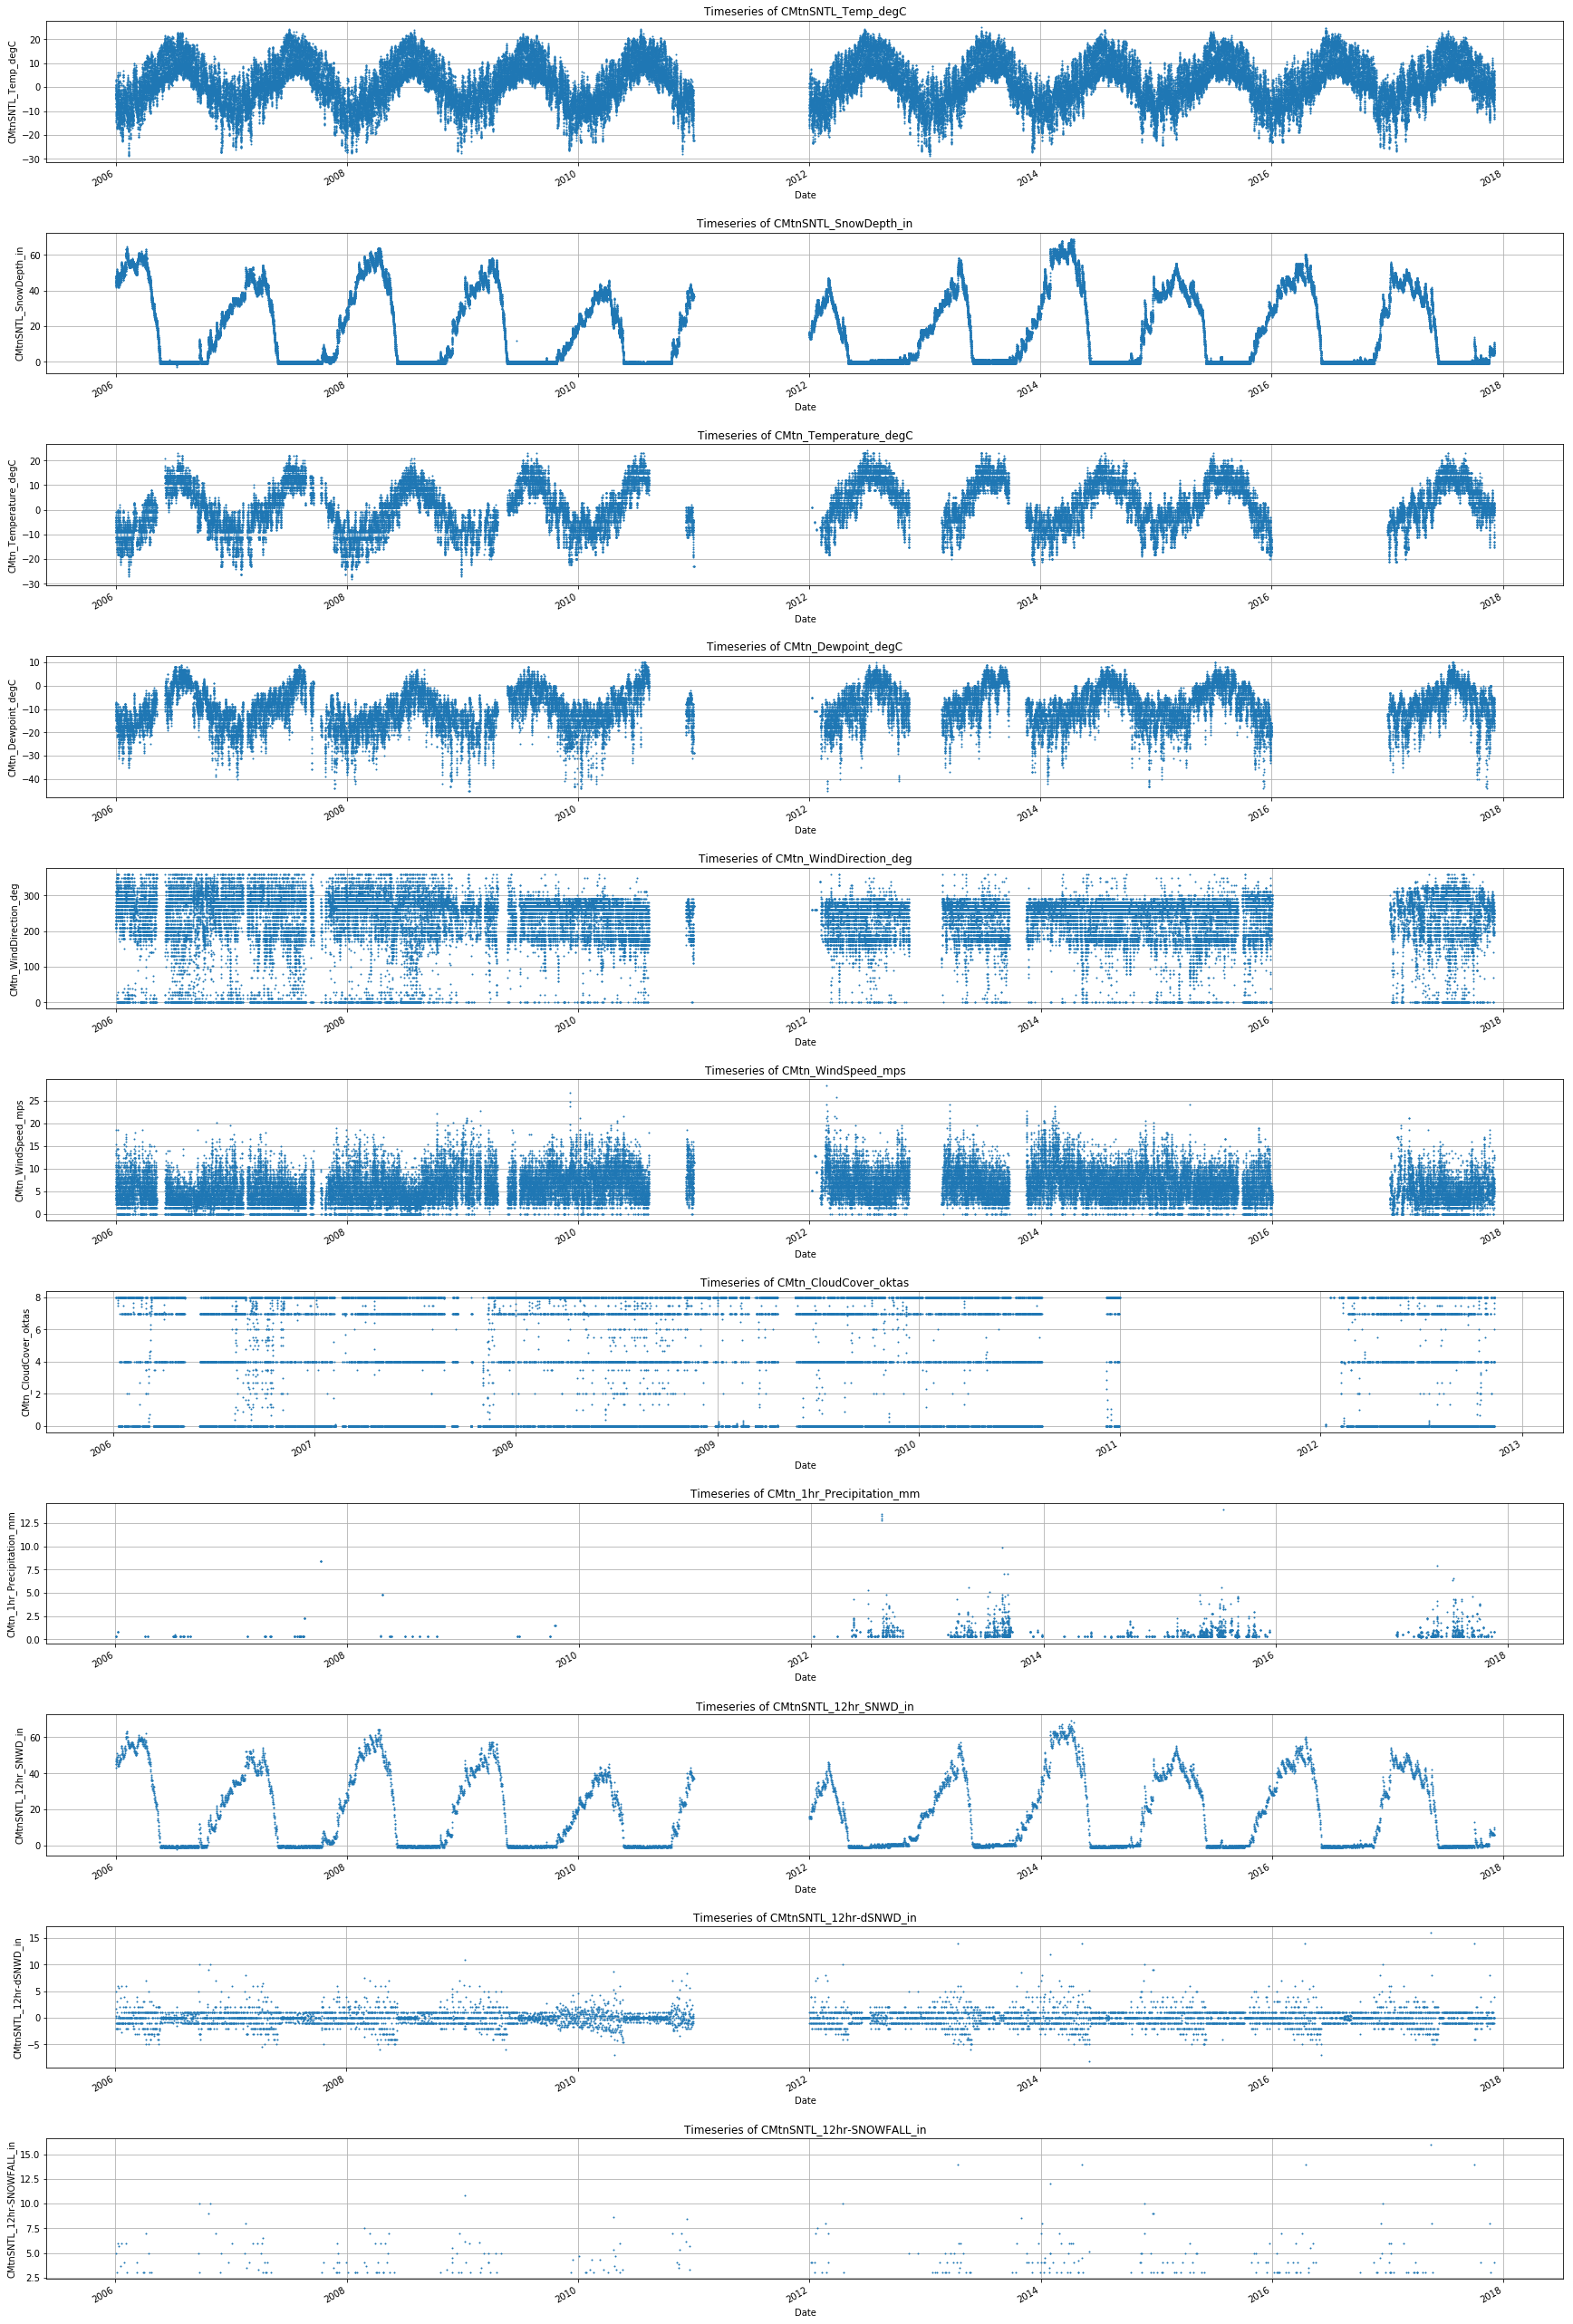

['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtnSNTL_12hr_SNWD_in', 'CMtnSNTL_12hr-dSNWD_in', 'CMtnSNTL_12hr-SNOWFALL_in']


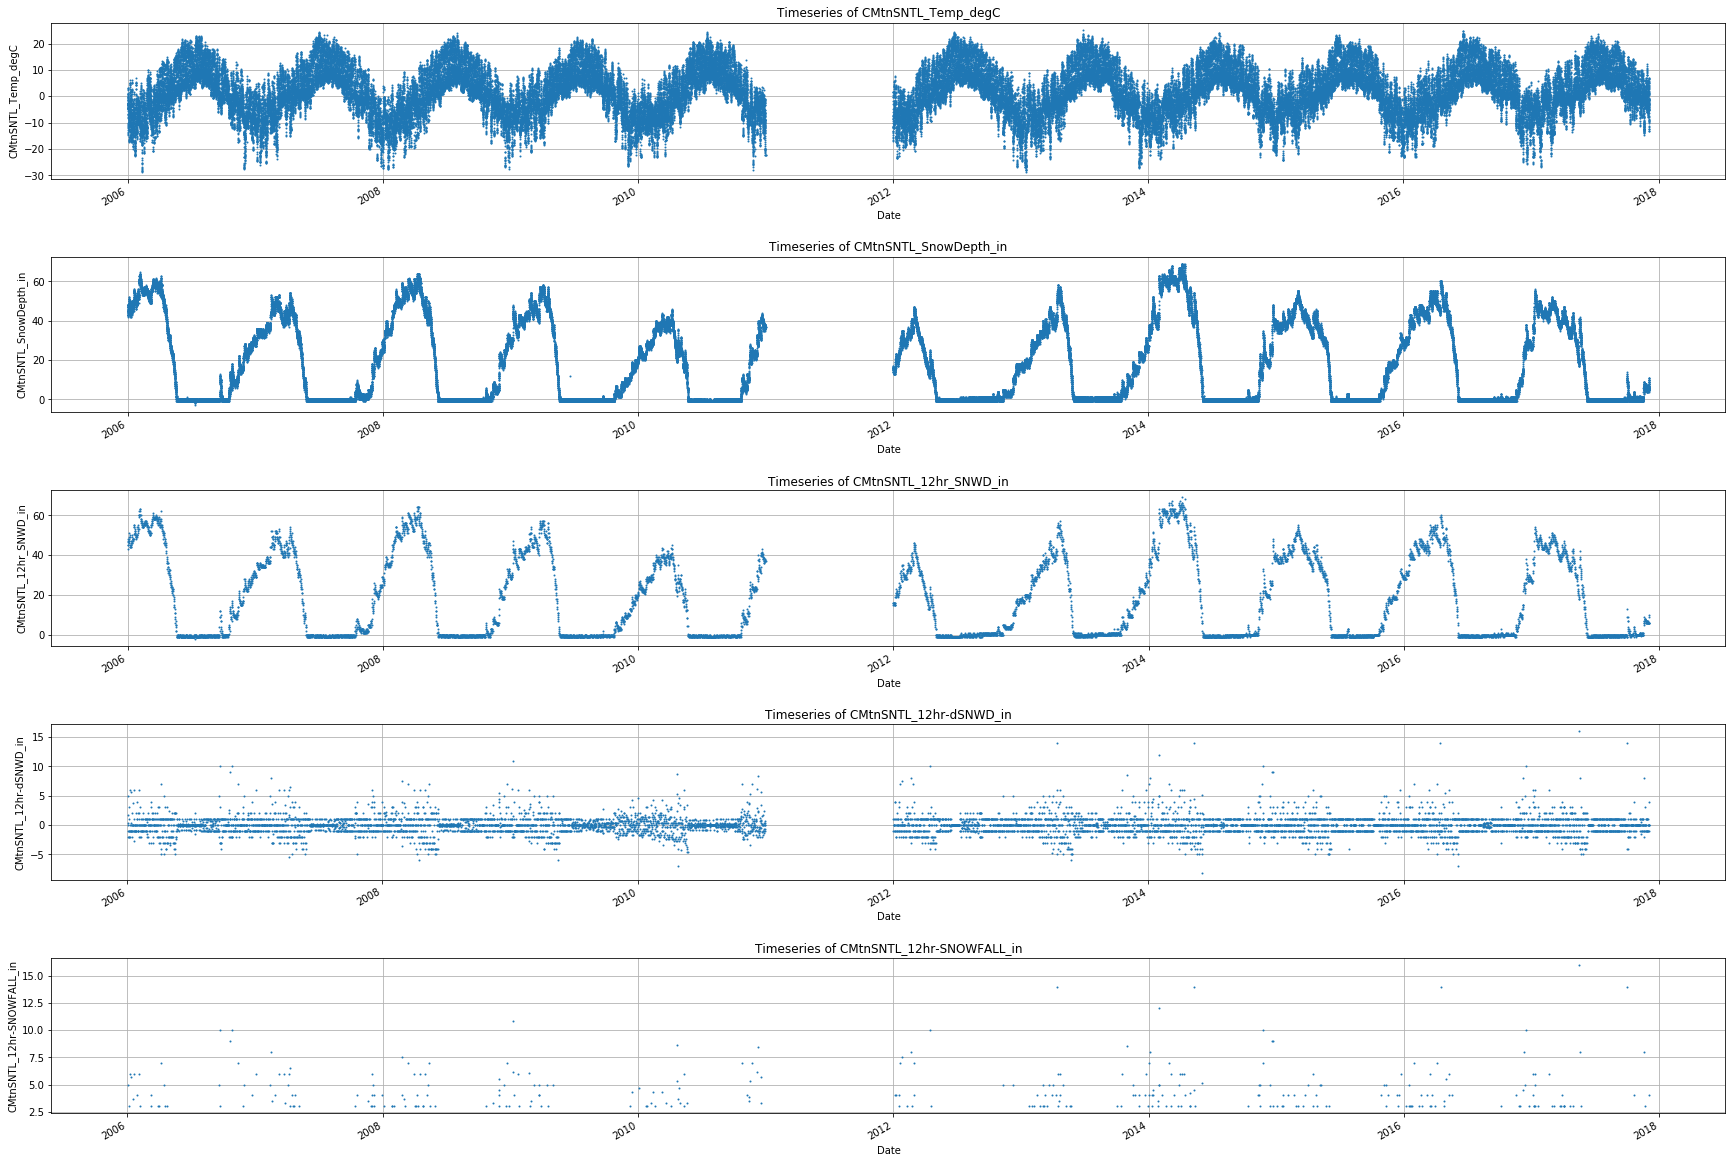

['LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindDirection_deg', 'LXV_WindSpeed_m/s', 'LXV_CloudCover_oktas', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm']


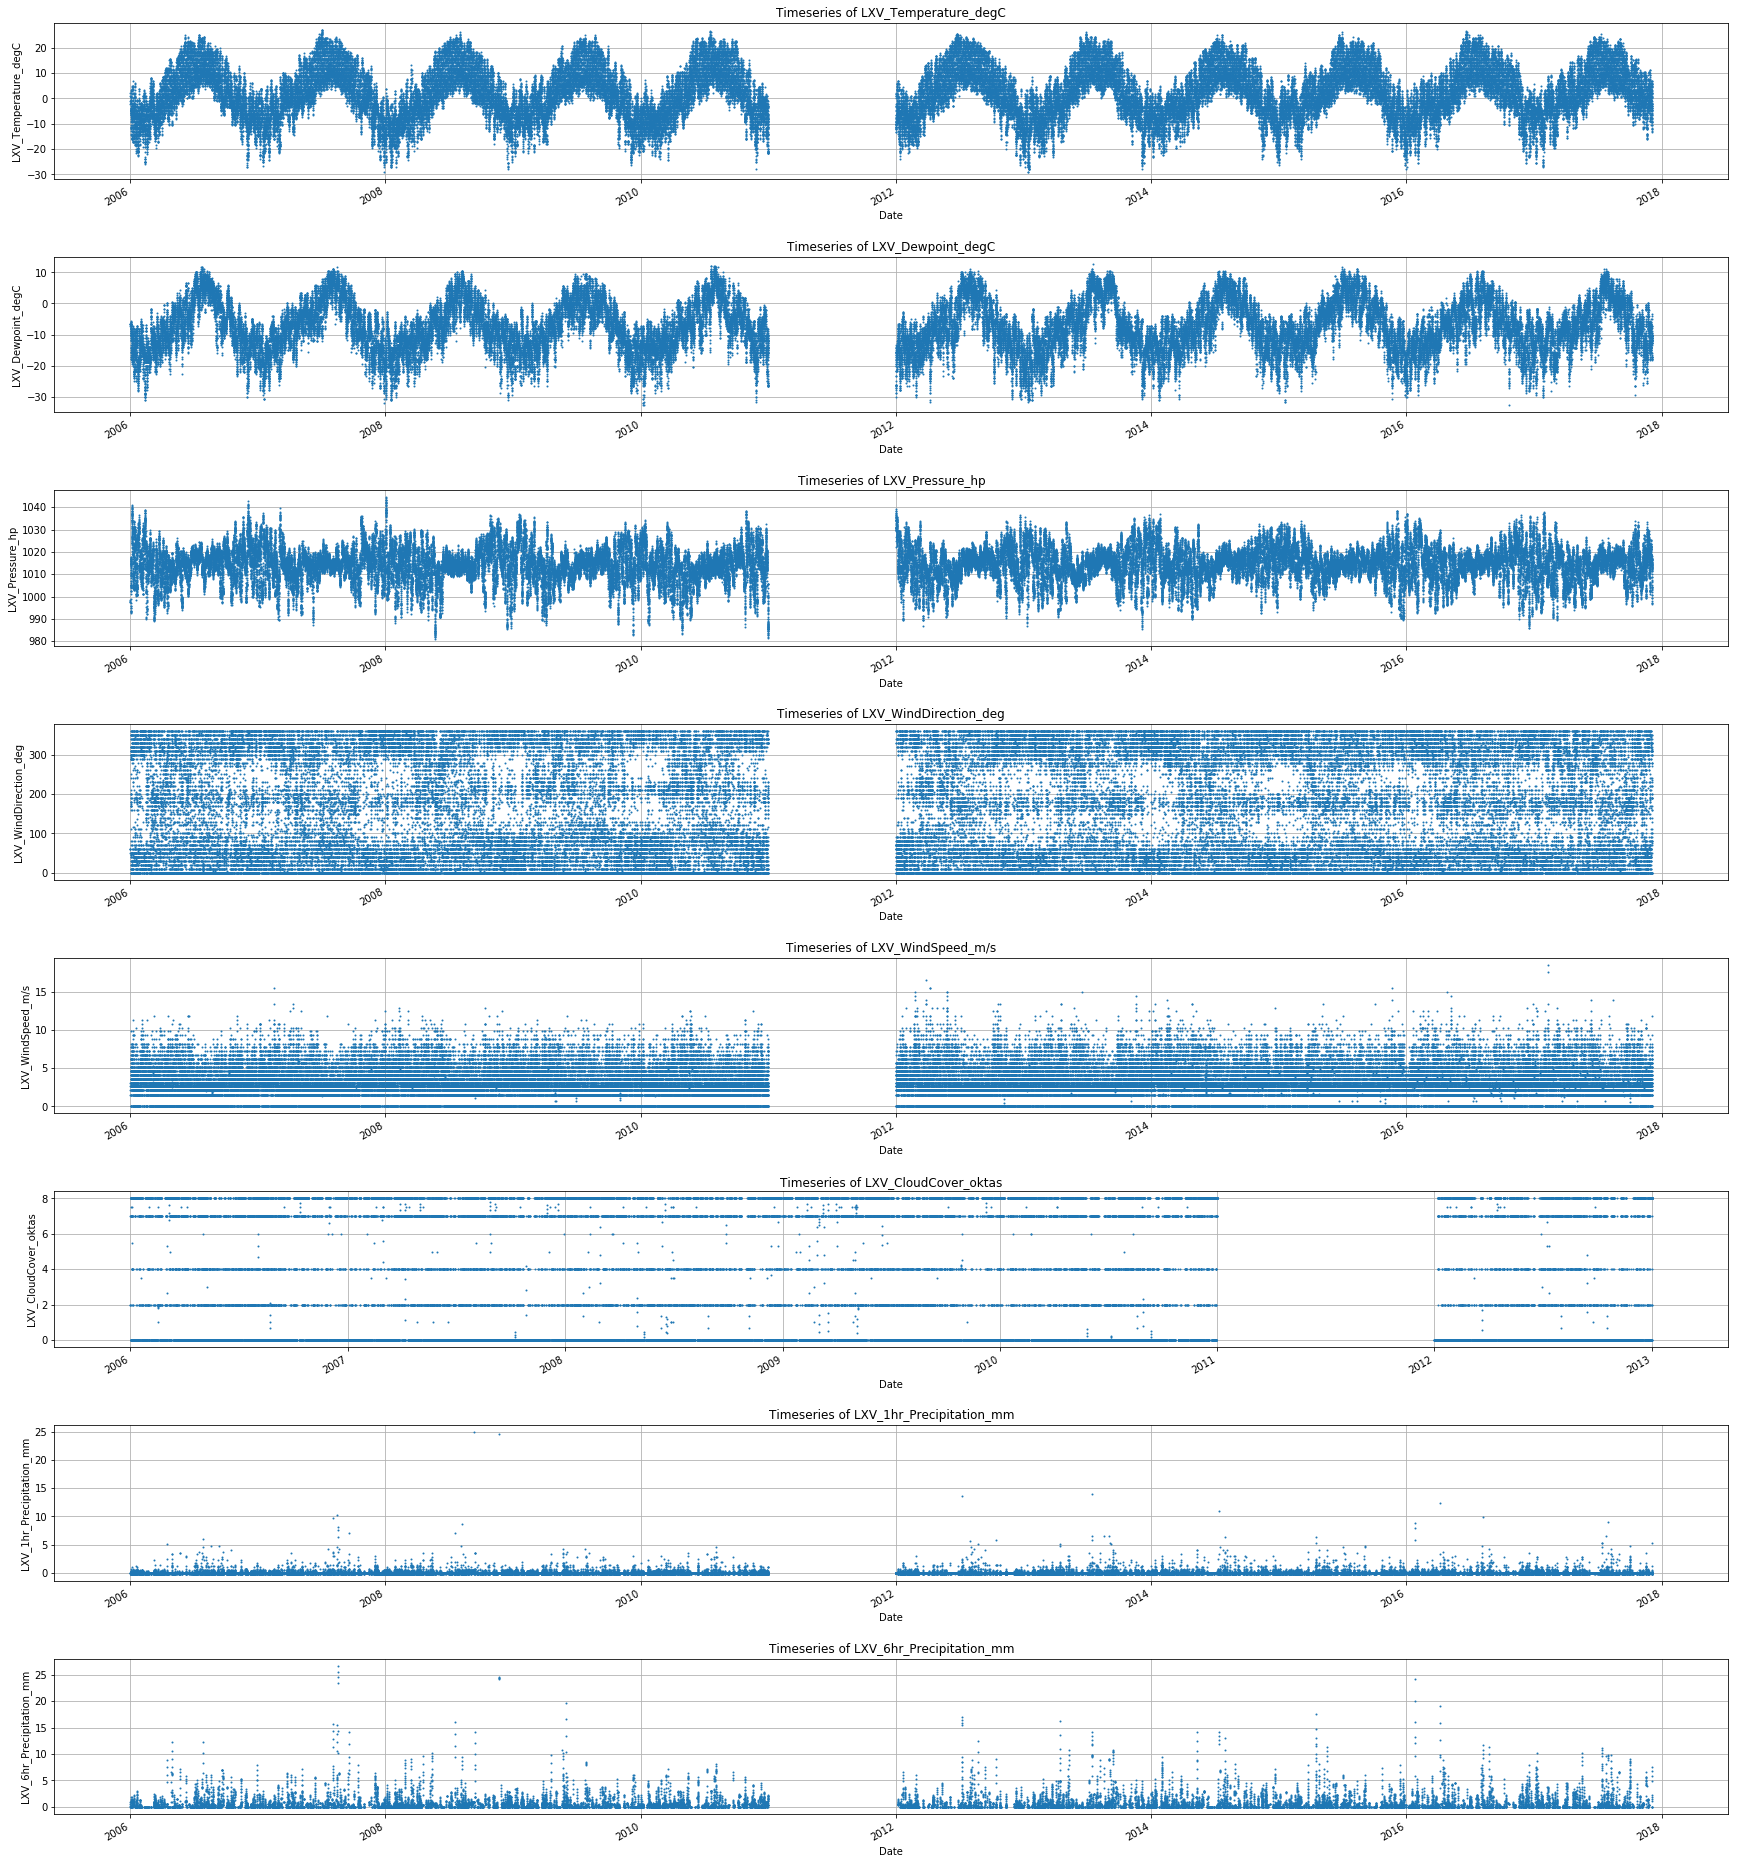

['KGJT_850mb_height_m', 'KGJT_850mb_tmpc', 'KGJT_850mb_dwpc', 'KGJT_850mb_drct', 'KGJT_850mb_speed_kts']


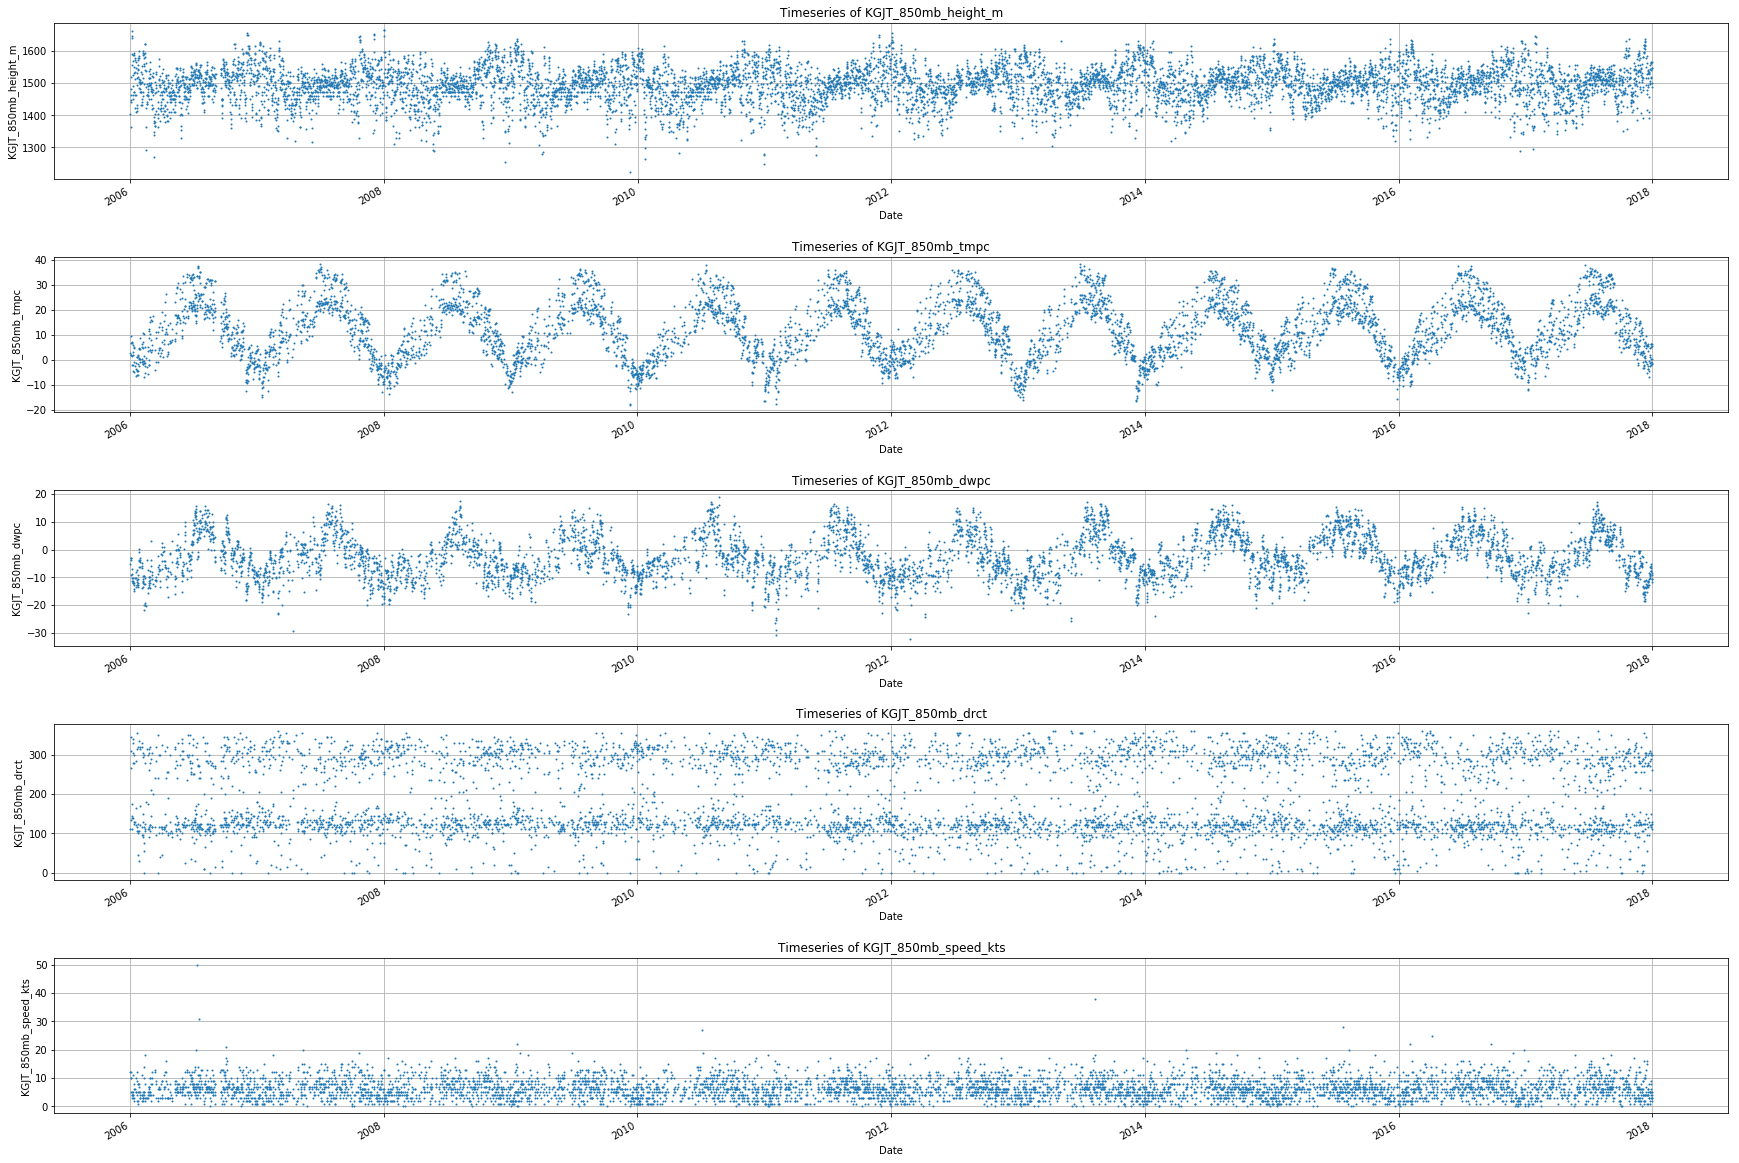

['KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts']


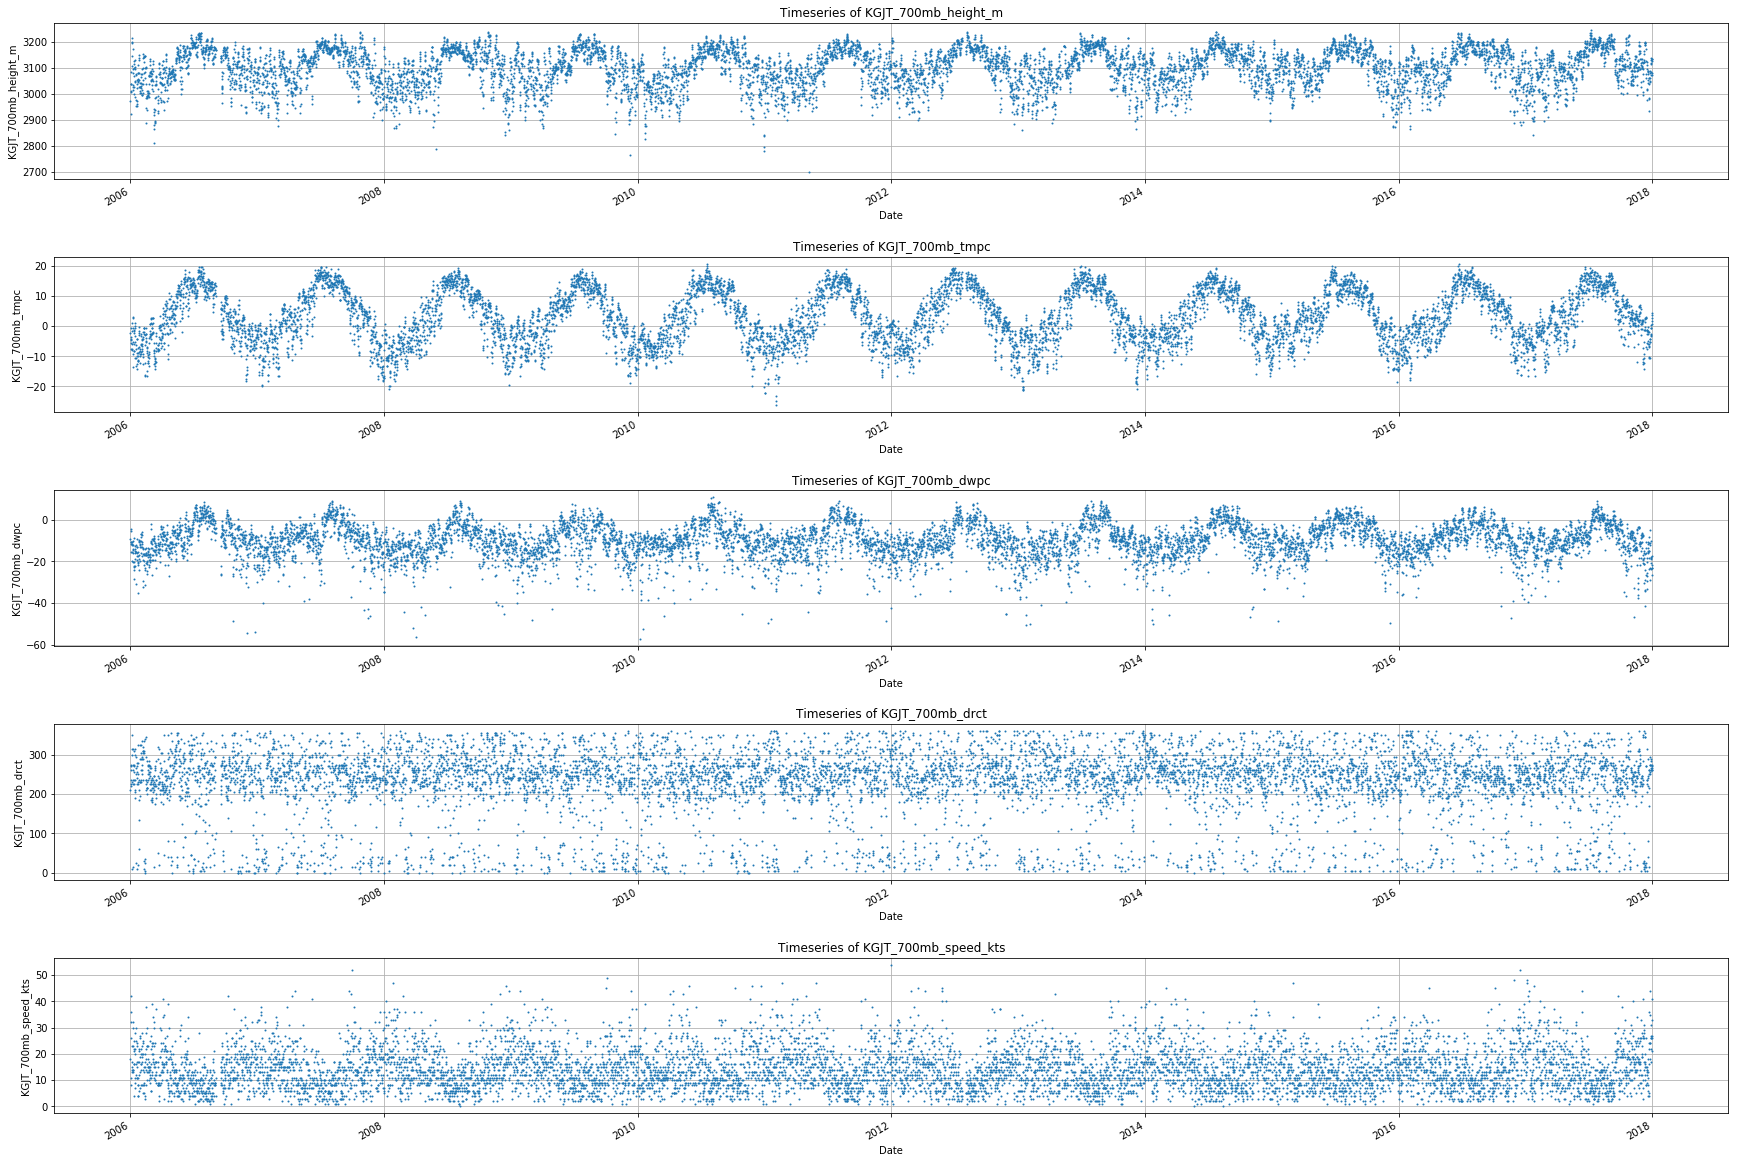

[]


<Figure size 2160x5040 with 0 Axes>

['KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts']


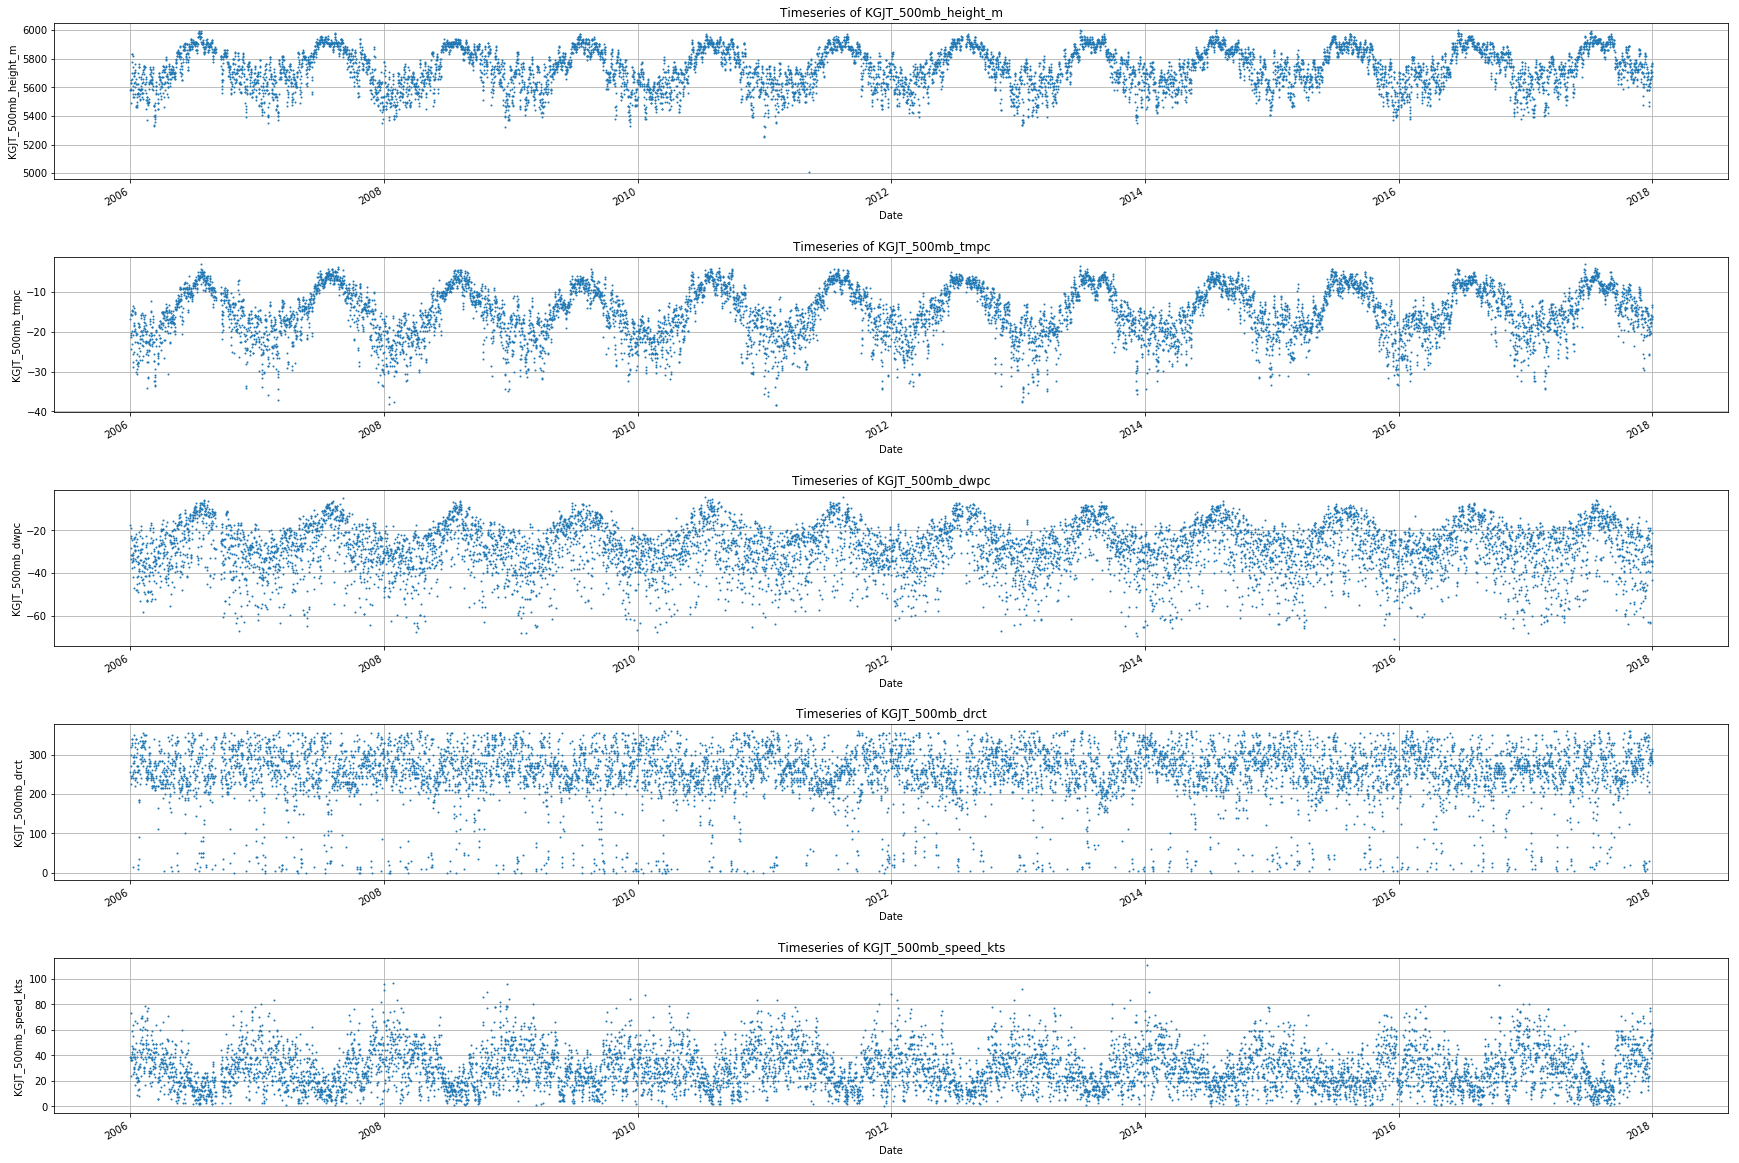

['KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts']


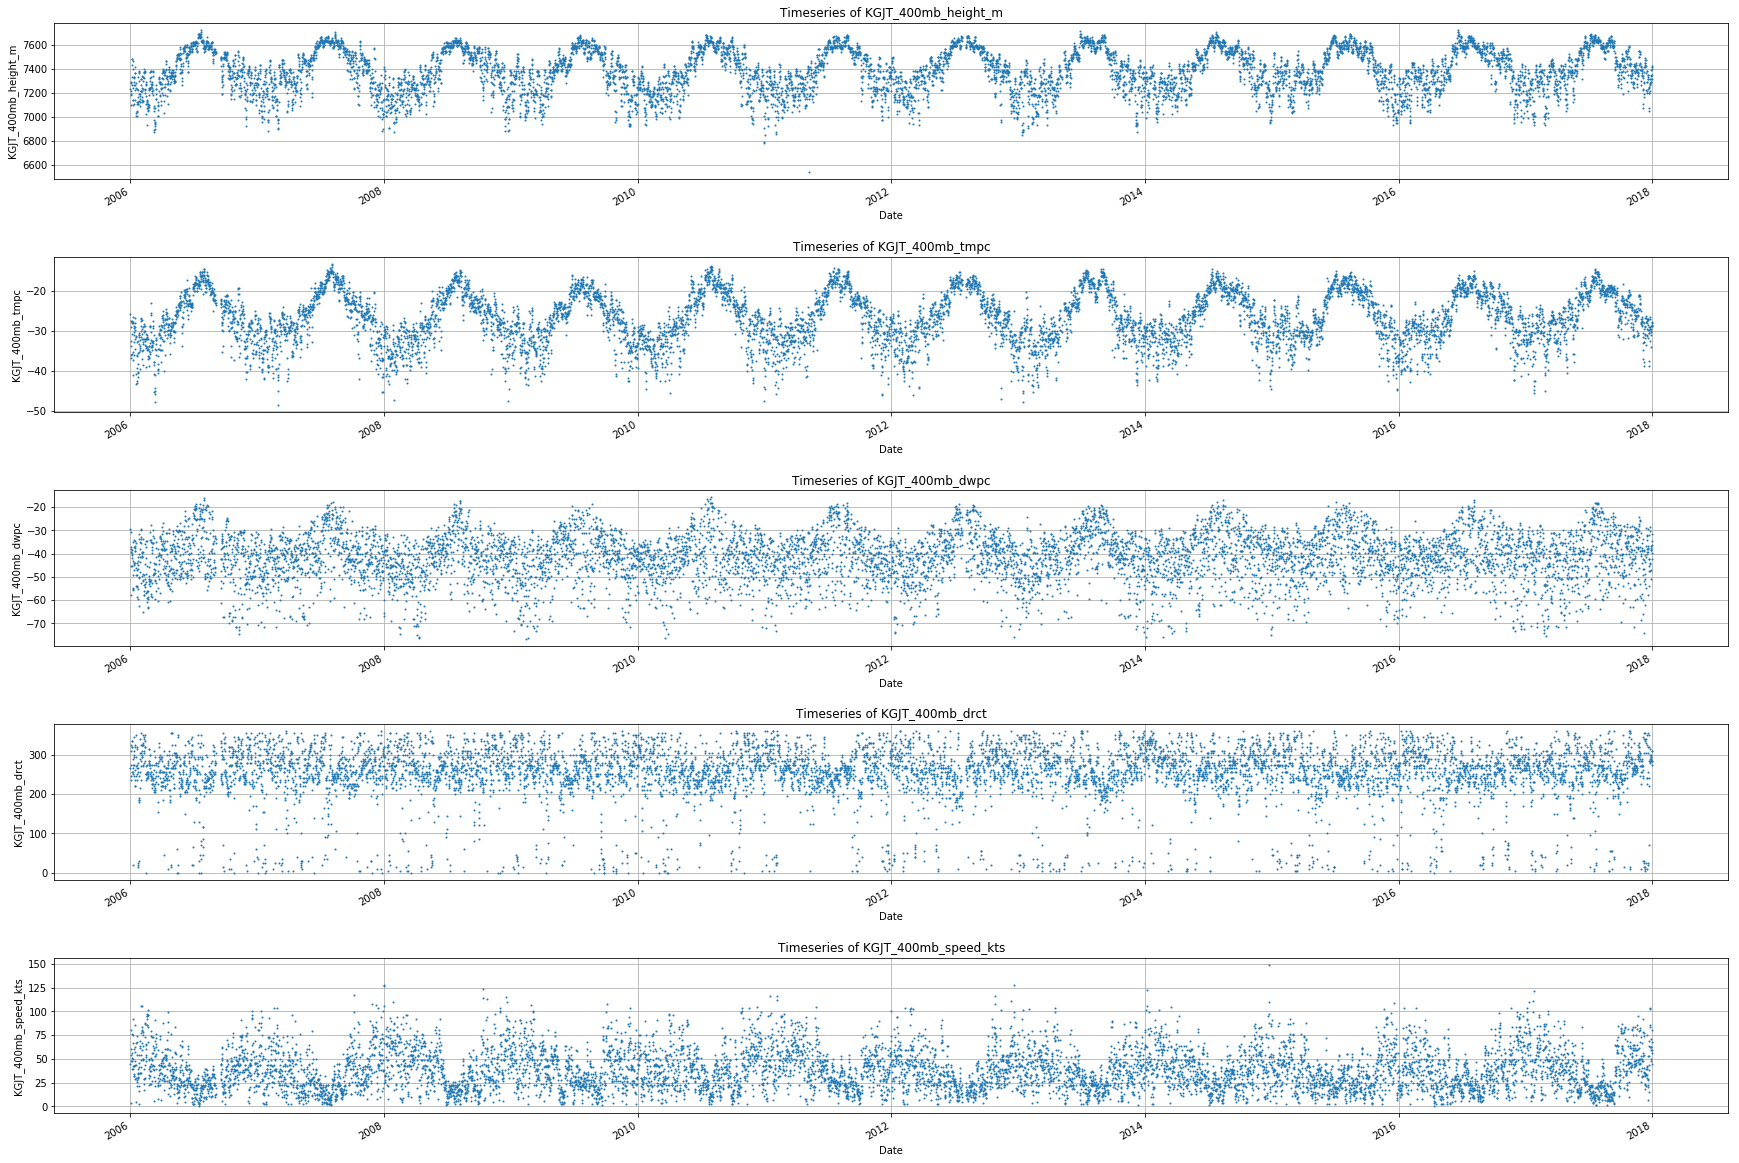

['KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts']


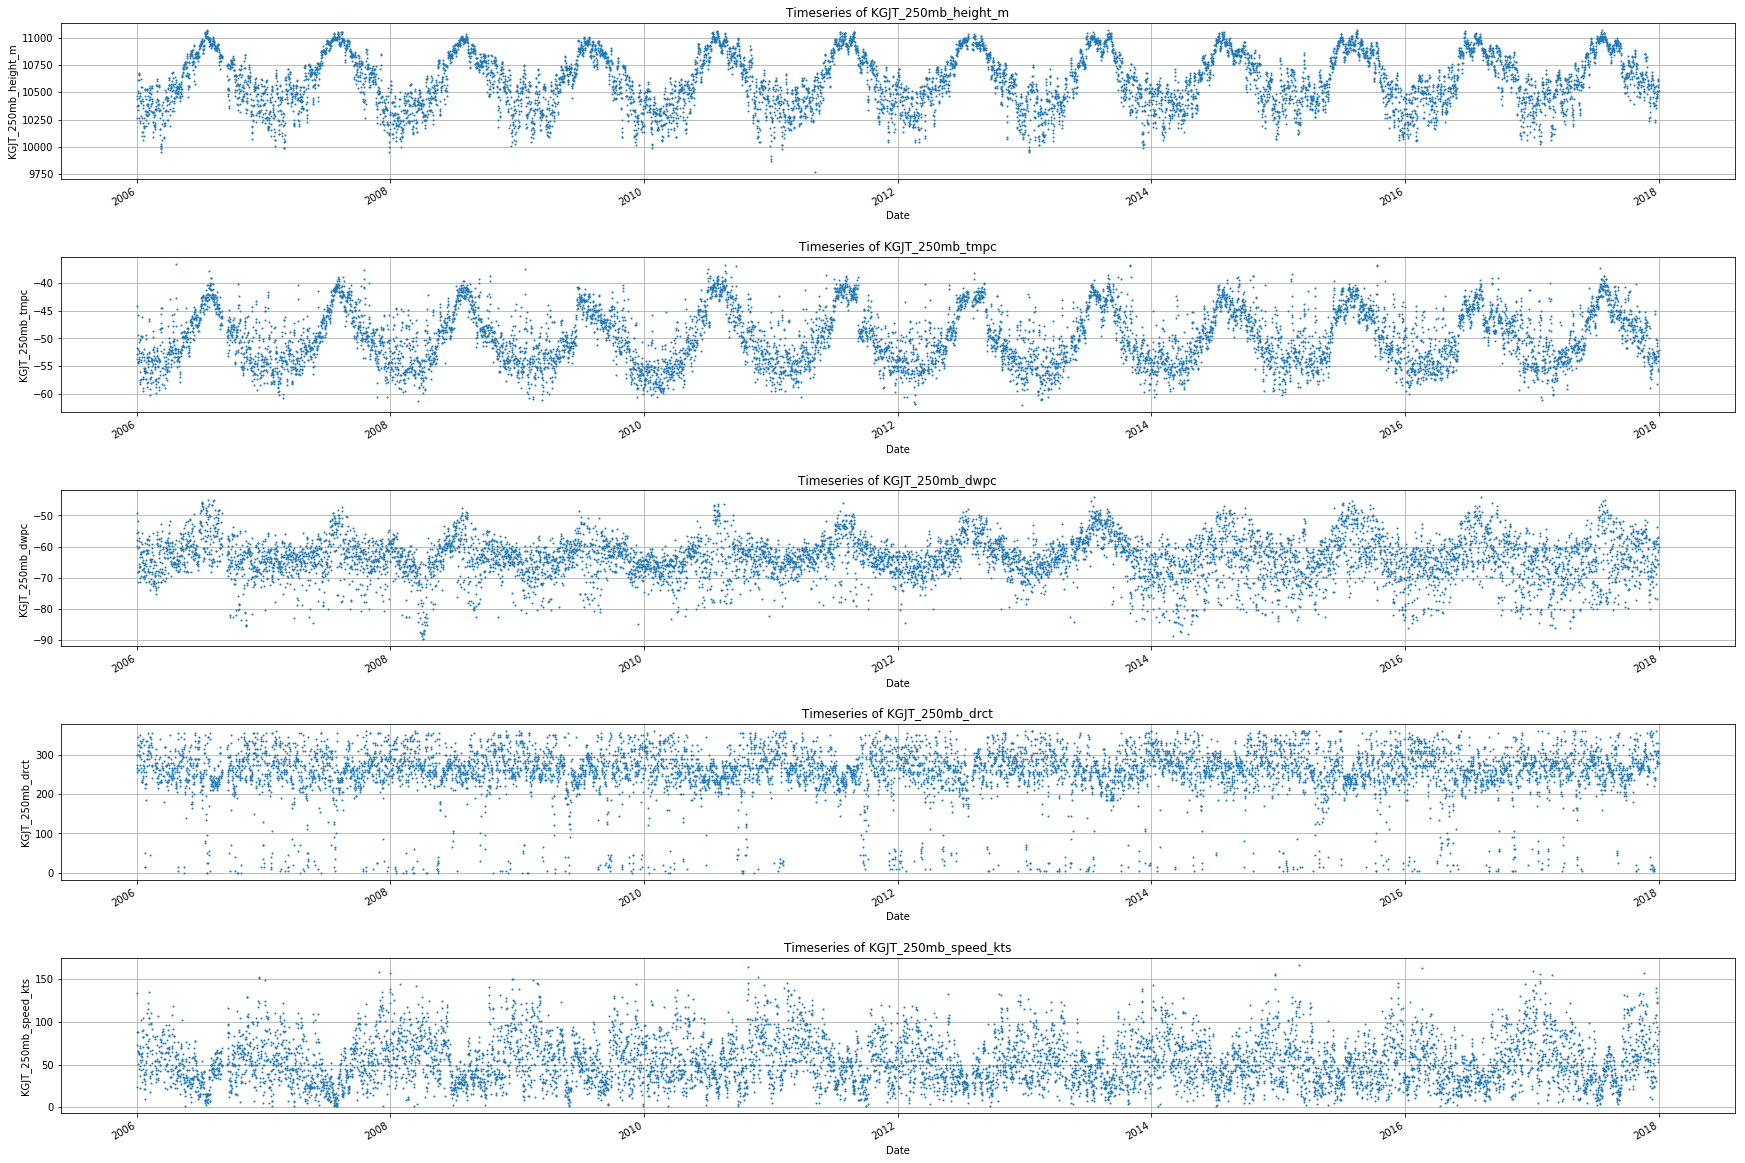

['KGJT_d700_250_height_m', 'KGJT_d700_250_tmpc', 'KGJT_d700_250_dwpc', 'KGJT_d700_250_drct', 'KGJT_d700_250_speed_kts']


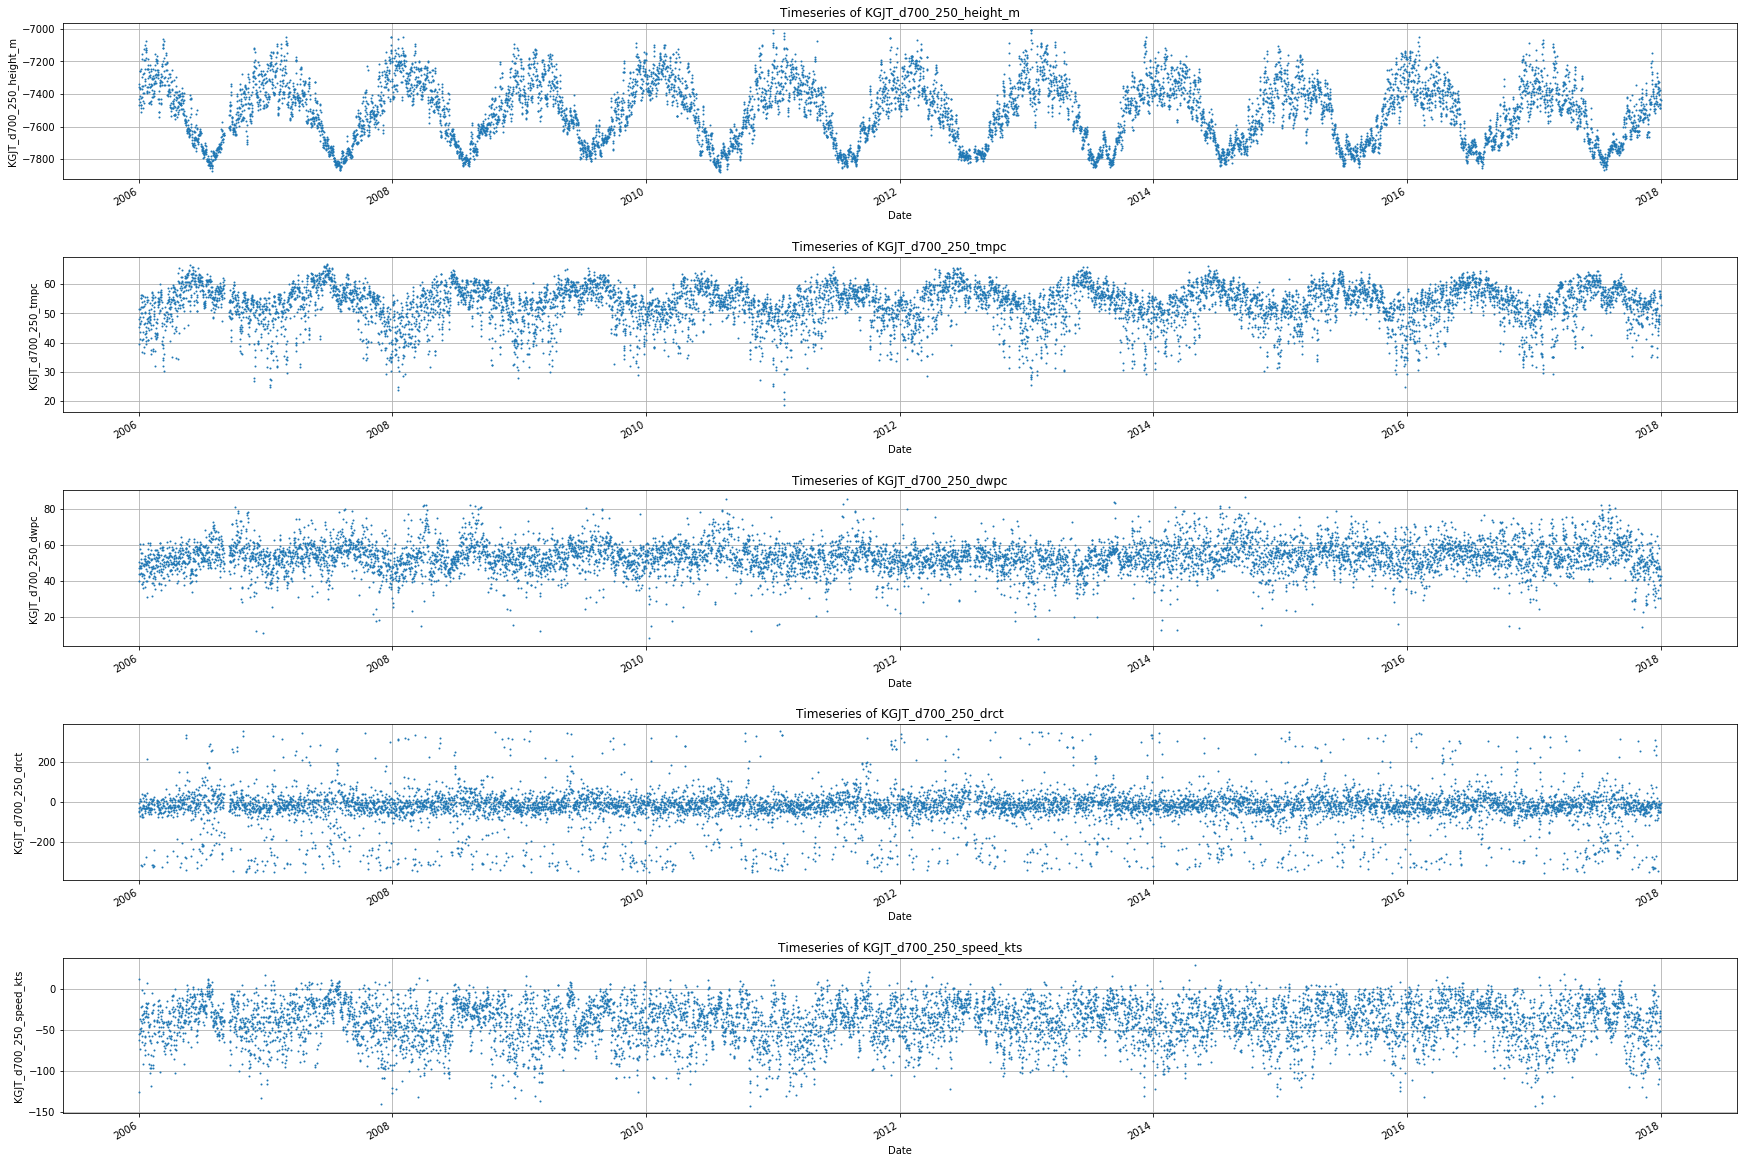

['KGJT_d850_700_height_m', 'KGJT_d850_700_tmpc', 'KGJT_d850_700_dwpc', 'KGJT_d850_700_drct', 'KGJT_d850_700_speed_kts']


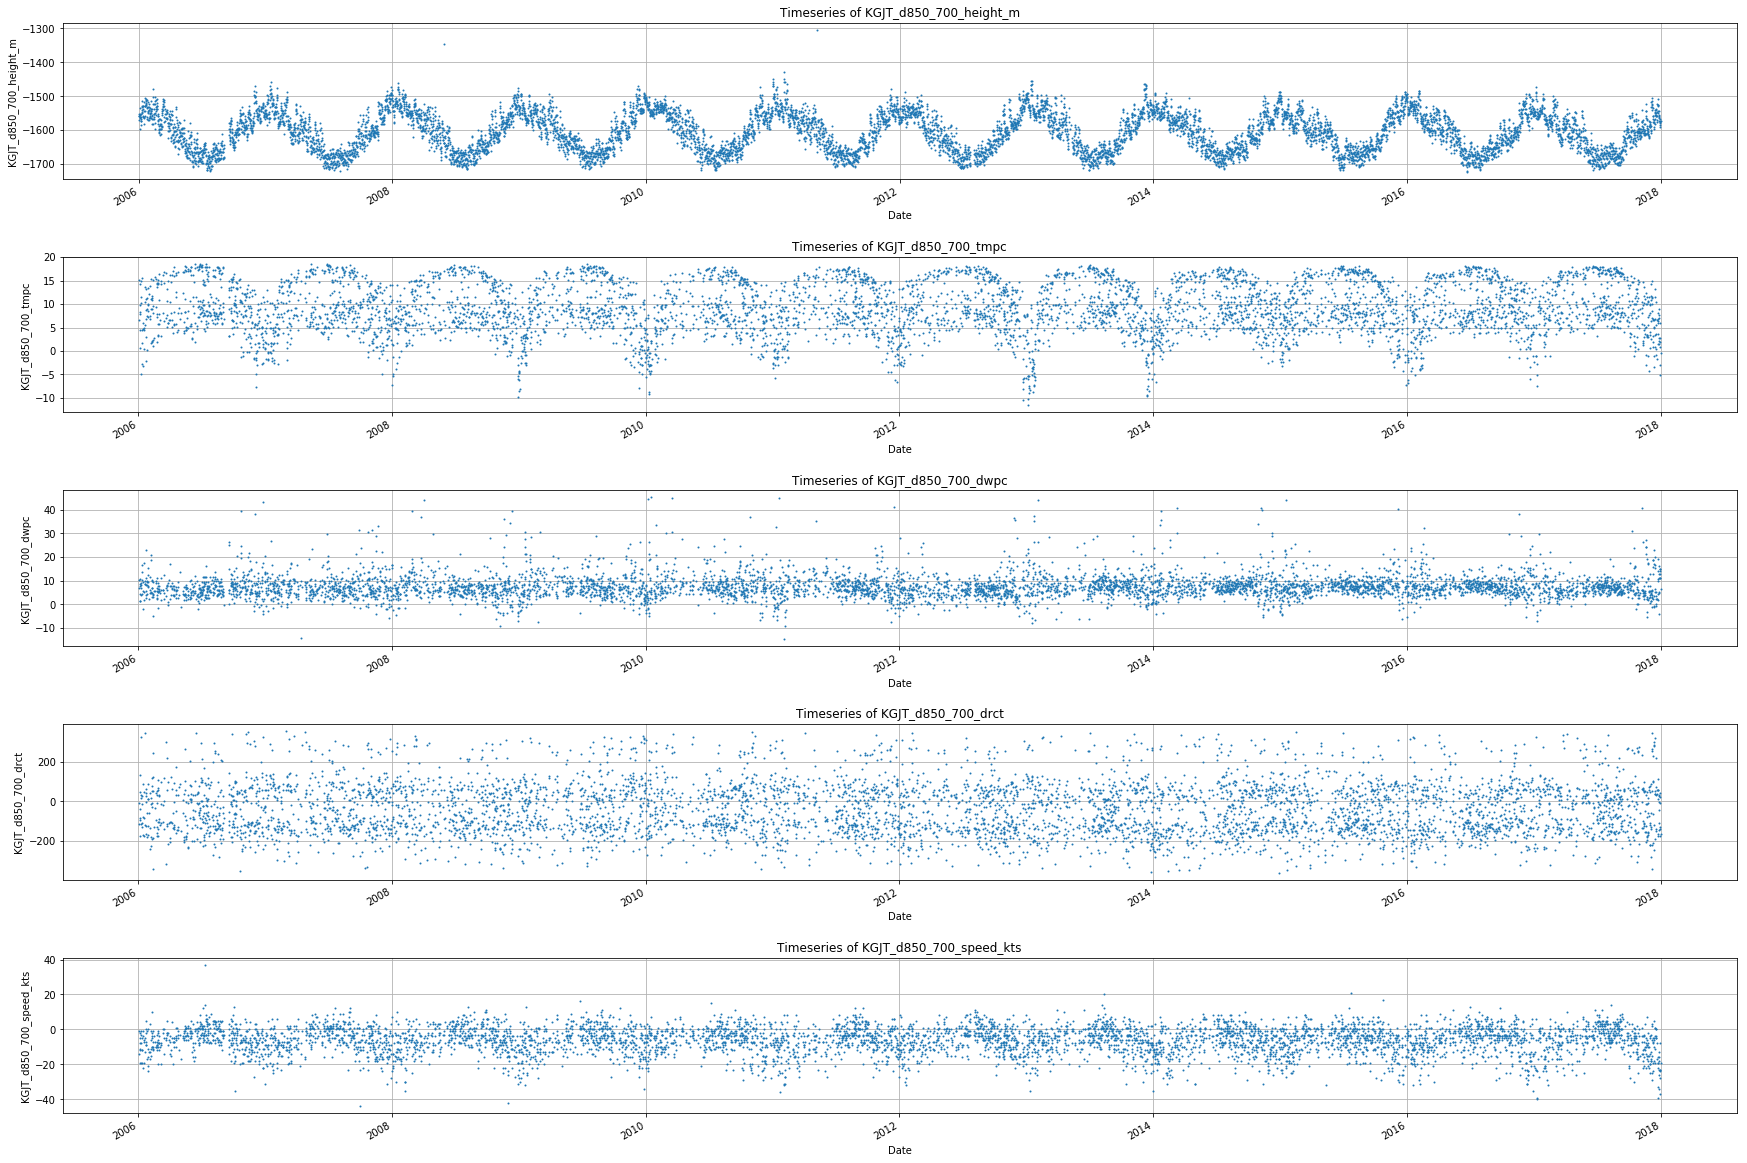

In [5]:
import re
ax = None
#%matplotlib notebook

levels = ['CMtn','CMtnSNTL', 'LXV', 'KGJT_850mb','KGJT_700mb', 'KGJT_600mb', 'KGJT_500mb', 'KGJT_400mb', 'KGJT_250mb','KGJT_d700_250', 'KGJT_d850_700']


for level in levels:
    
    fig = plt.figure(figsize=(30,70))
    
        #keys = re.findall(levels[level], asos_snotel_UA_df.keys().tolist())

    keys = list(filter(re.compile(level).search, (asos_snotel_UA_df.keys().tolist())))
    print(keys)
    #print(len(keys))

    
    #keys = asos_snotel_UA_df.filter(regex=level).columns
    for k in range(len(keys)):    
           
     
       plt.subplot(15,1, k+1)
       plt.subplots_adjust(hspace=0.5, wspace=0.2)
        
       ax = None
       ax = asos_snotel_UA_df[keys[k]]['2006':'2017'].plot(linestyle='None', ax = ax, marker = ".", markersize = 2)
       ax.set_xlabel("Date")
       ax.set_ylabel(keys[k])
    
       plt.title("Timeseries of " + keys[k])
       plt.grid()
       plt.axis('tight')
    #fig.savefig(keys[k]+'.png')
    plt.show()
    
    fig.clf()
    plt.close()
  

# plt.show()


** &#8657; Some notes:  
There is a a lot of missing data for year 2011 and 2016 - this should be kept in mind as it could skew some our analyeses slightly  **



***


## Linear Regression of meteorological variables and snowfall

**Linear Regression plots were created and regression statistics were calculated using SciPy's linegress function:**

['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'CMtn_WindDirection_deg', 'CMtn_WindSpeed_mps', 'CMtn_CloudCover_oktas', 'CMtn_1hr_Precipitation_mm', 'CMtnSNTL_12hr_SNWD_in', 'CMtnSNTL_12hr-dSNWD_in', 'CMtnSNTL_12hr-SNOWFALL_in']


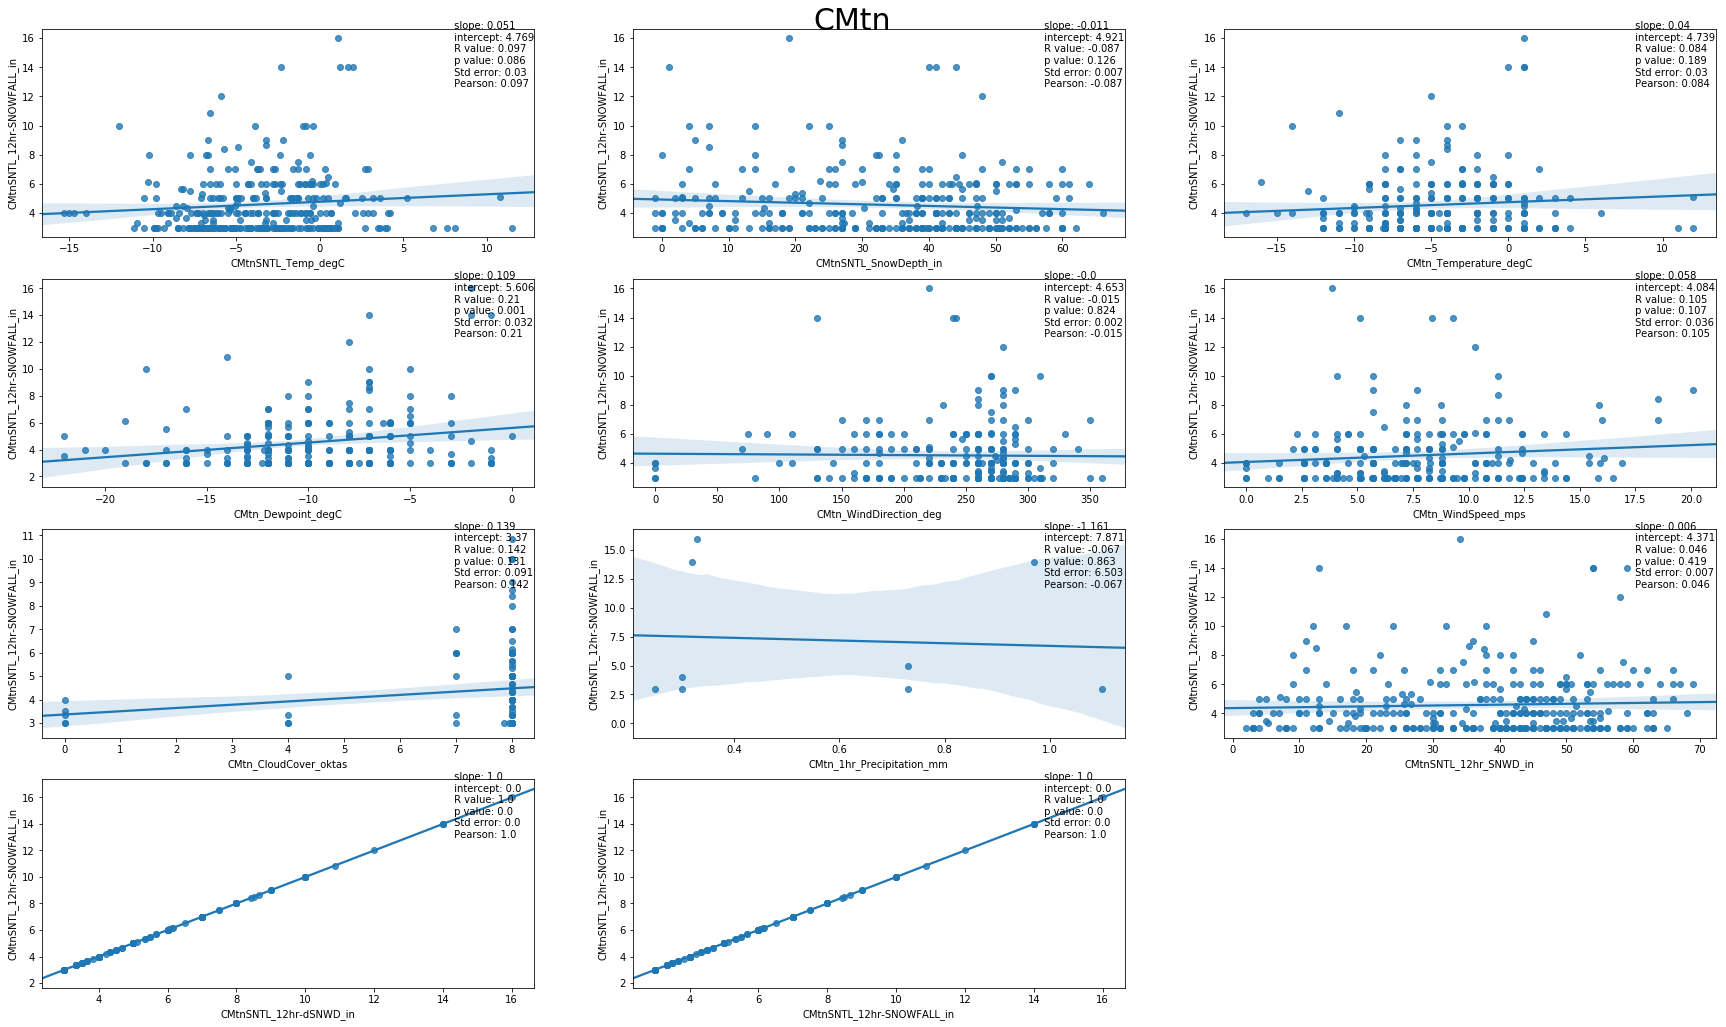

['CMtnSNTL_Temp_degC', 'CMtnSNTL_SnowDepth_in', 'CMtnSNTL_12hr_SNWD_in', 'CMtnSNTL_12hr-dSNWD_in', 'CMtnSNTL_12hr-SNOWFALL_in']


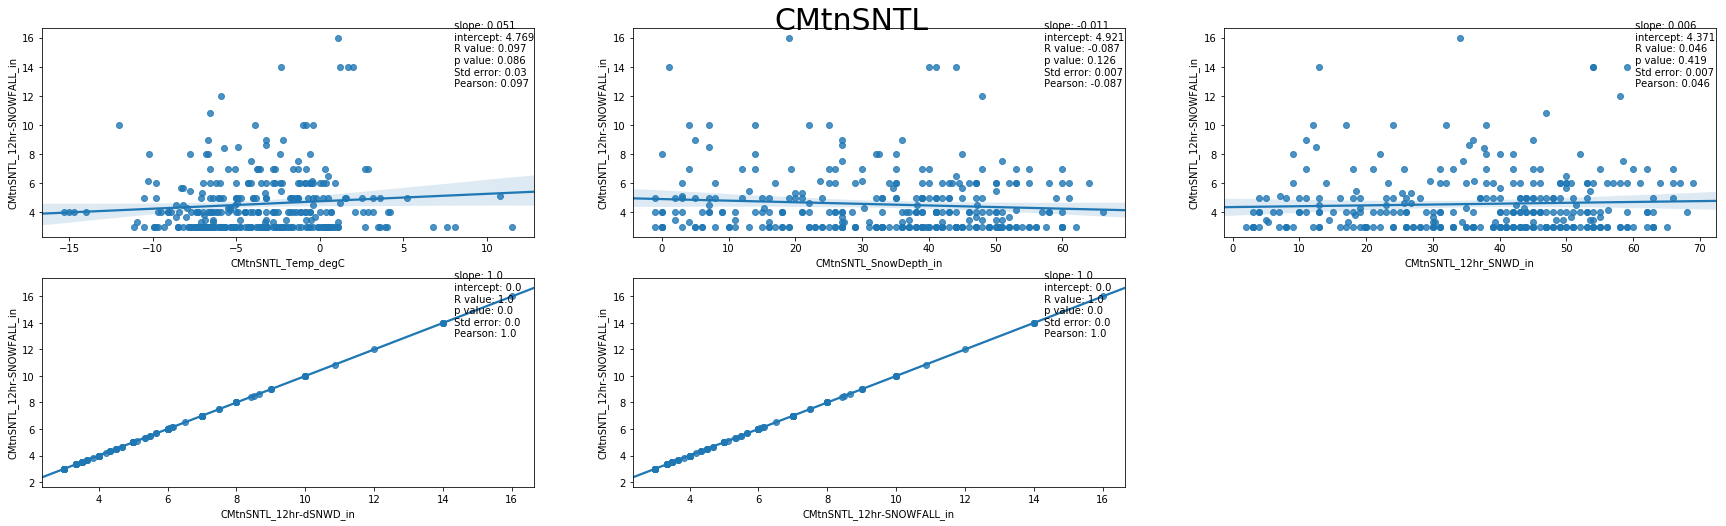

['LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp', 'LXV_WindDirection_deg', 'LXV_WindSpeed_m/s', 'LXV_CloudCover_oktas', 'LXV_1hr_Precipitation_mm', 'LXV_6hr_Precipitation_mm']


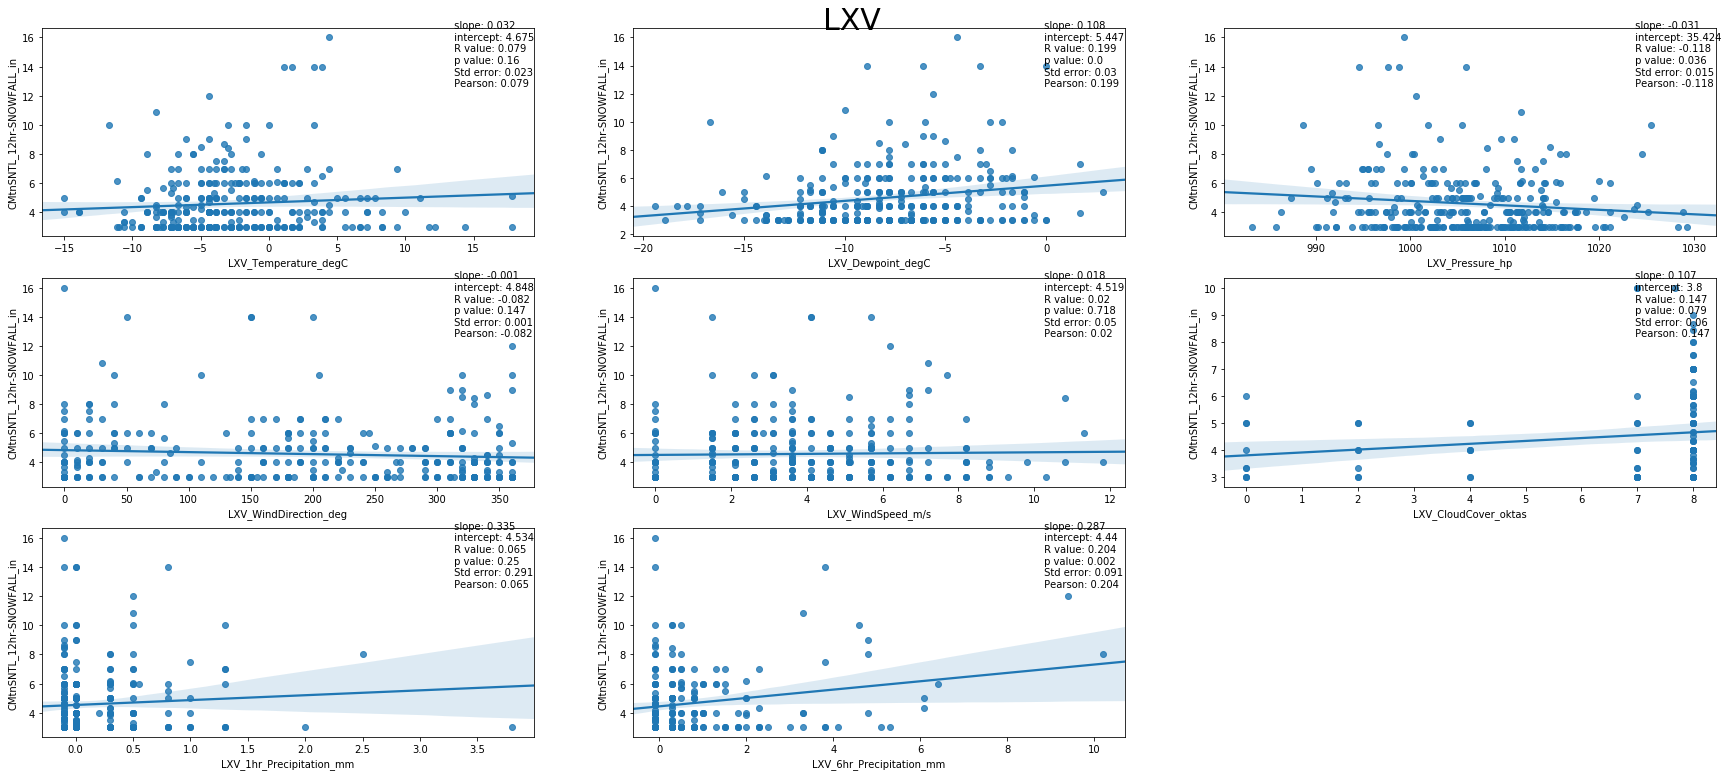

['KGJT_850mb_height_m', 'KGJT_850mb_tmpc', 'KGJT_850mb_dwpc', 'KGJT_850mb_drct', 'KGJT_850mb_speed_kts']


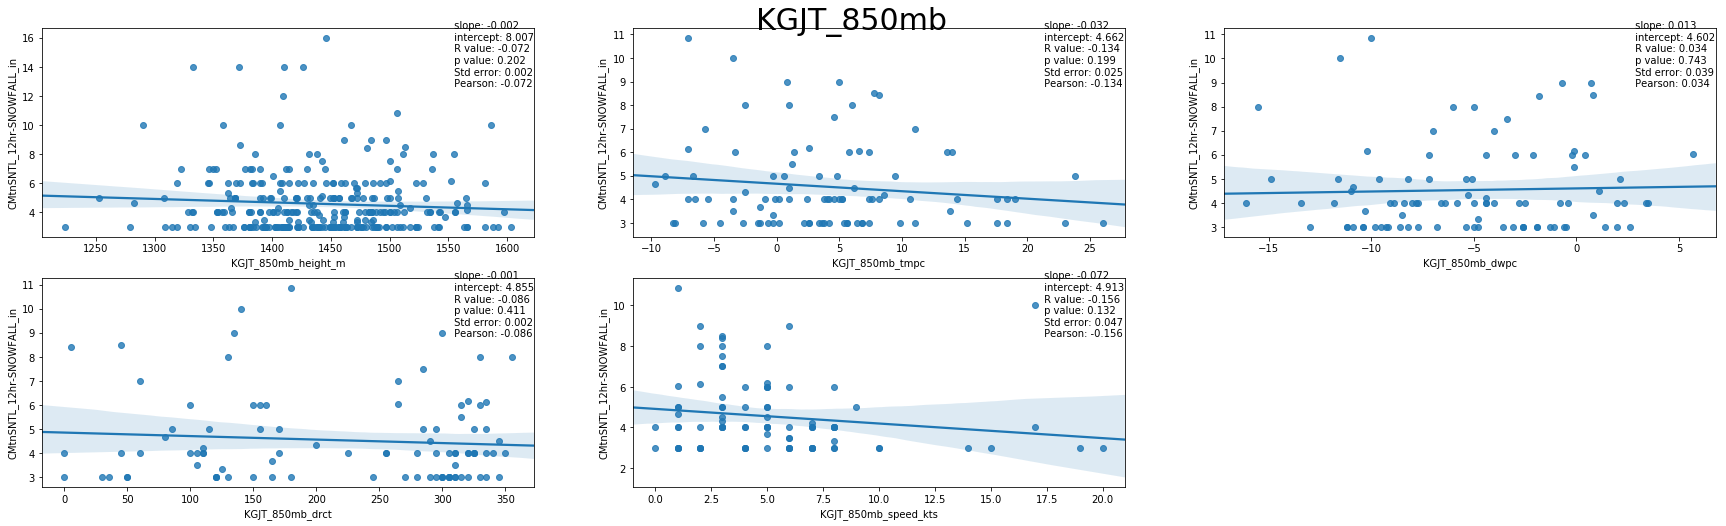

['KGJT_700mb_height_m', 'KGJT_700mb_tmpc', 'KGJT_700mb_dwpc', 'KGJT_700mb_drct', 'KGJT_700mb_speed_kts']


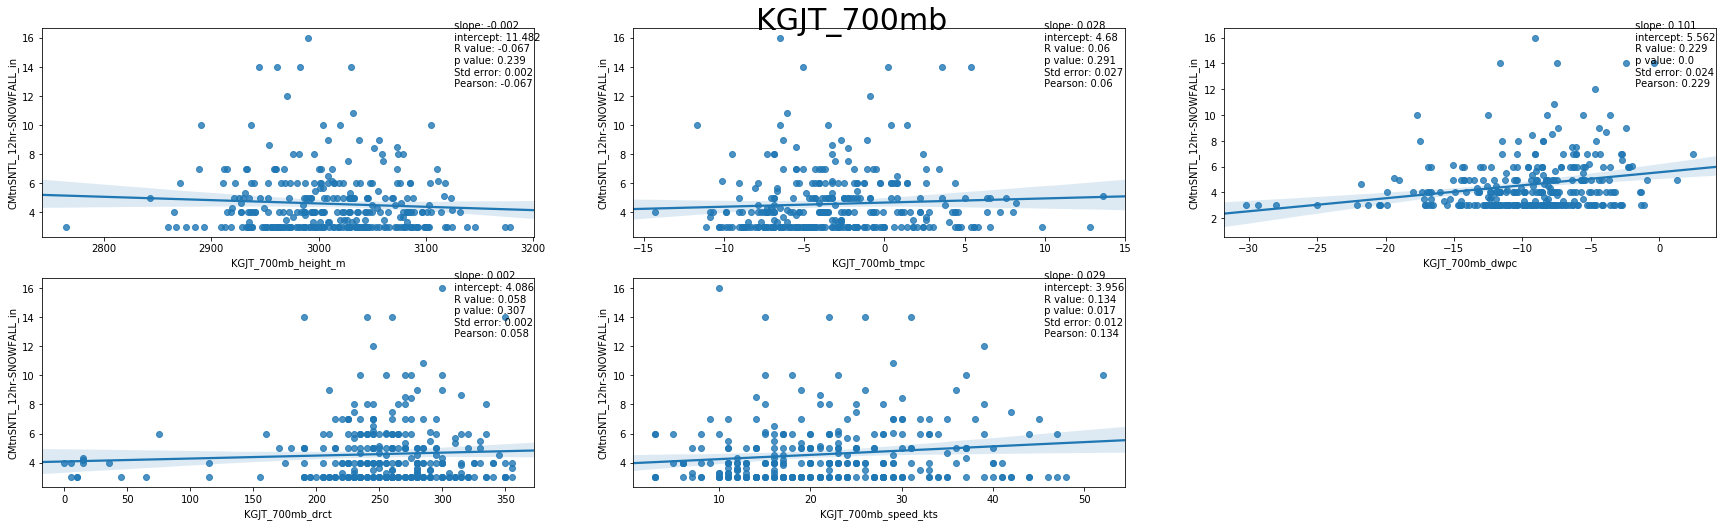

['KGJT_500mb_height_m', 'KGJT_500mb_tmpc', 'KGJT_500mb_dwpc', 'KGJT_500mb_drct', 'KGJT_500mb_speed_kts']


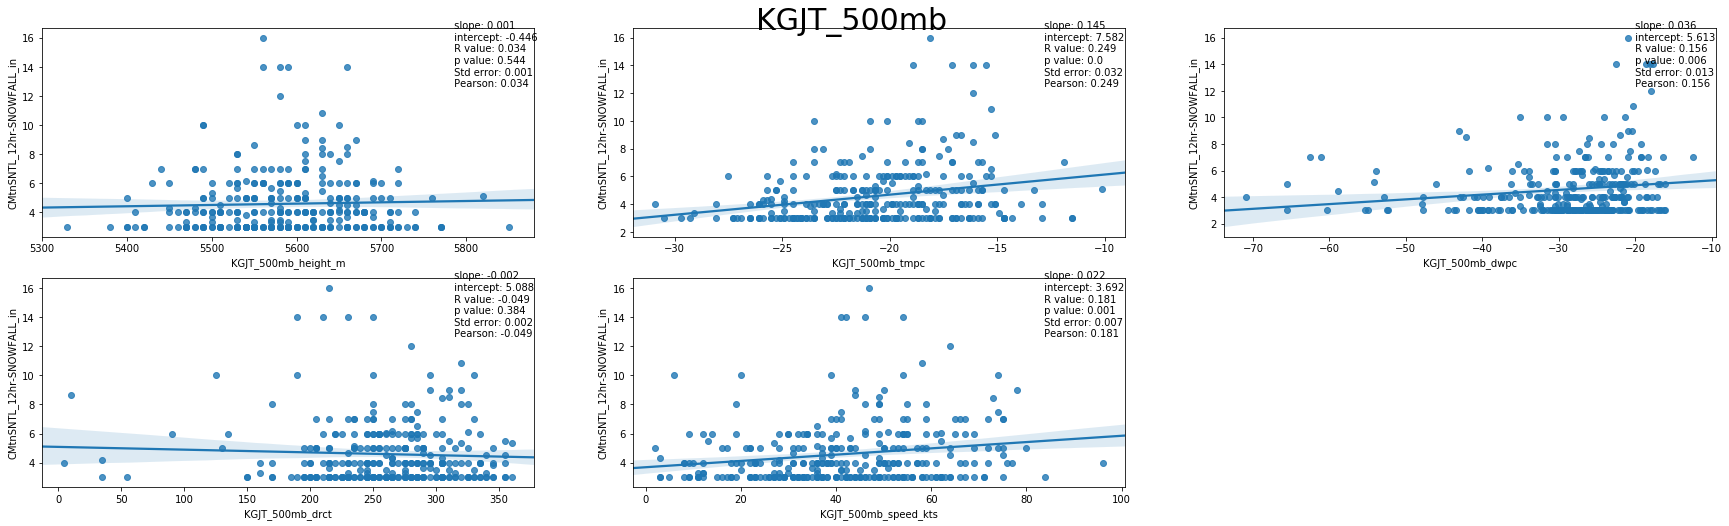

['KGJT_400mb_height_m', 'KGJT_400mb_tmpc', 'KGJT_400mb_dwpc', 'KGJT_400mb_drct', 'KGJT_400mb_speed_kts']


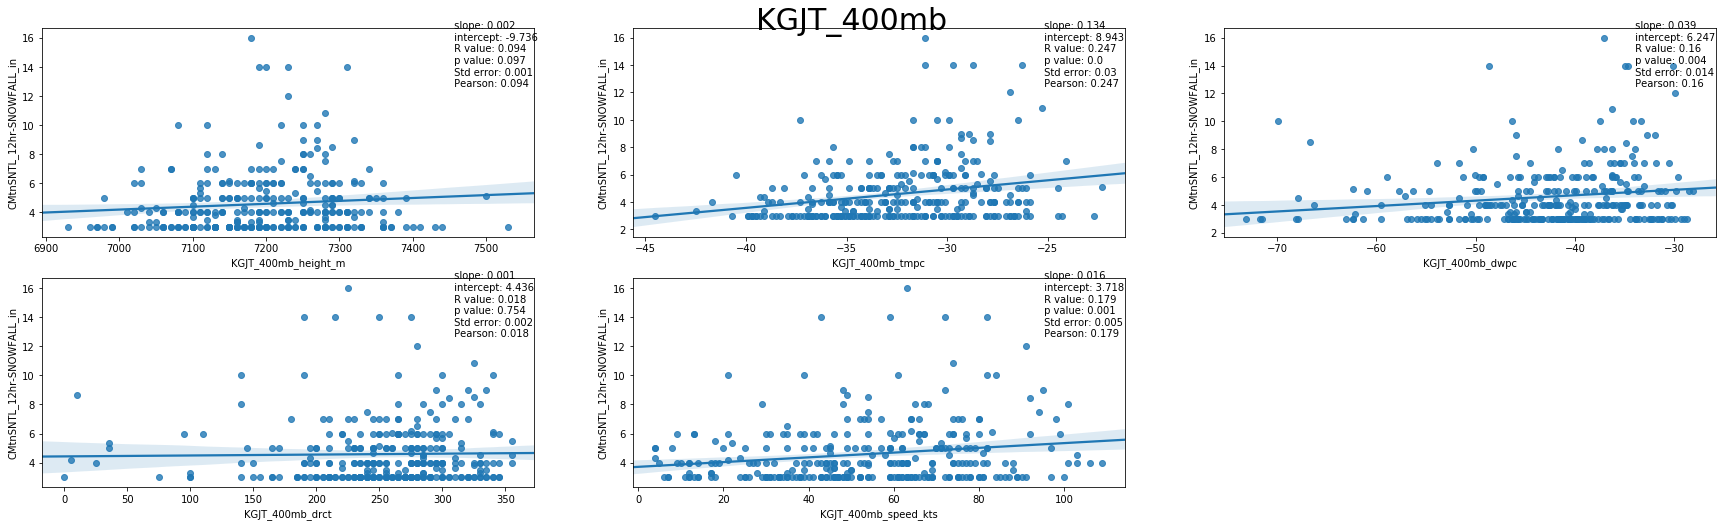

['KGJT_250mb_height_m', 'KGJT_250mb_tmpc', 'KGJT_250mb_dwpc', 'KGJT_250mb_drct', 'KGJT_250mb_speed_kts']


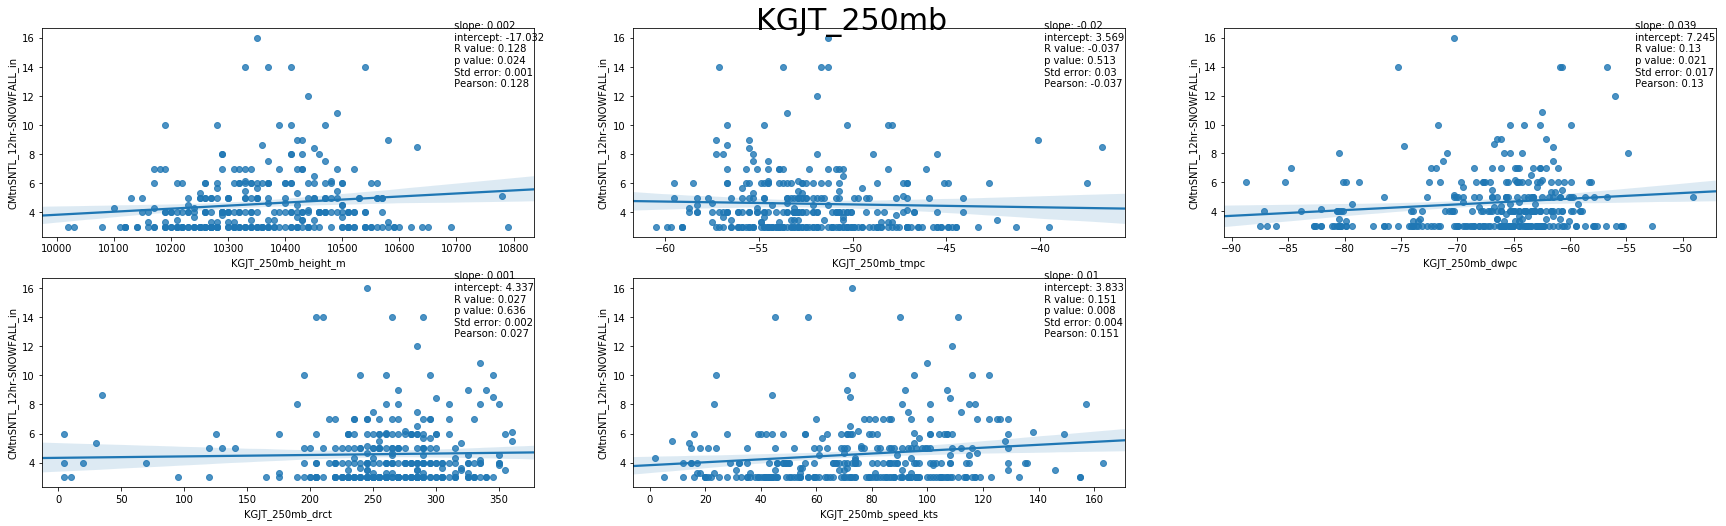

['KGJT_d700_250_height_m', 'KGJT_d700_250_tmpc', 'KGJT_d700_250_dwpc', 'KGJT_d700_250_drct', 'KGJT_d700_250_speed_kts']


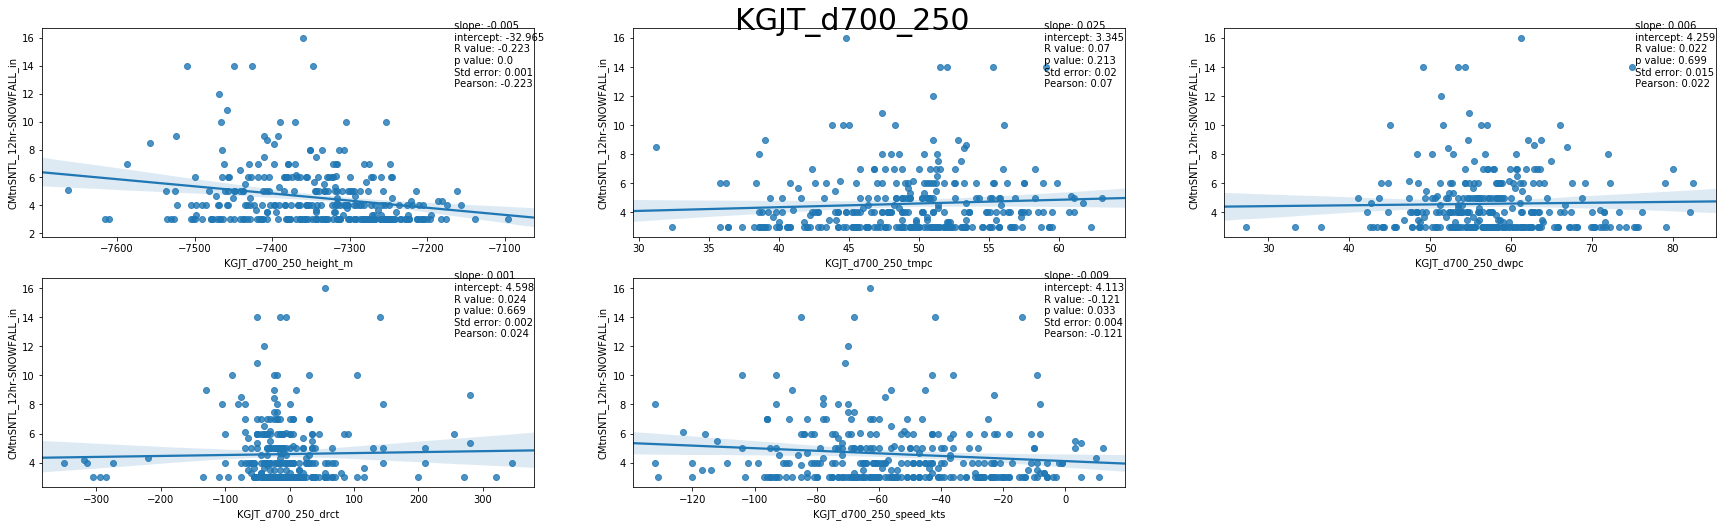

['KGJT_d850_700_height_m', 'KGJT_d850_700_tmpc', 'KGJT_d850_700_dwpc', 'KGJT_d850_700_drct', 'KGJT_d850_700_speed_kts']


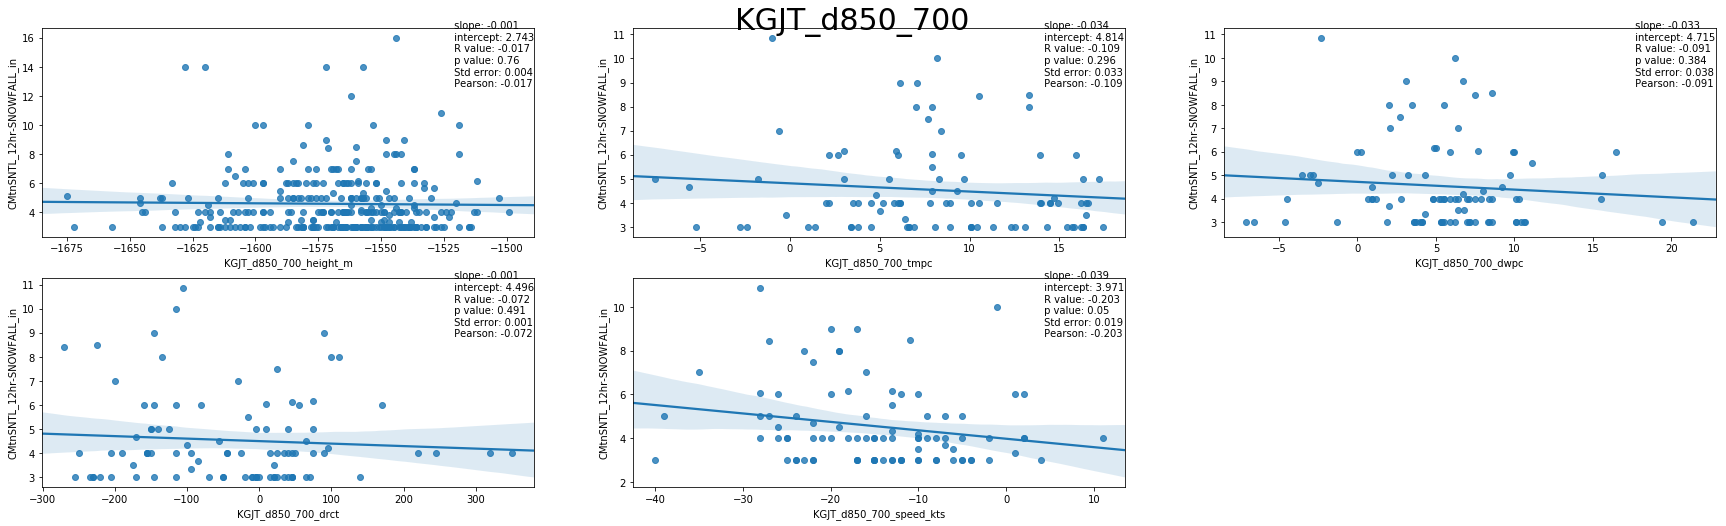

In [6]:
import re
from scipy.stats import pearsonr, linregress

ax = None
#%matplotlib notebook

yy = None
yy = (asos_snotel_UA_df['CMtnSNTL_12hr-SNOWFALL_in']>=3)
snf_df = asos_snotel_UA_df['CMtnSNTL_12hr-SNOWFALL_in'][yy]




levels = ['CMtn','CMtnSNTL', 'LXV', 'KGJT_850mb','KGJT_700mb', 'KGJT_500mb', 'KGJT_400mb', 'KGJT_250mb','KGJT_d700_250', 'KGJT_d850_700']
#levels = ['CMtn']

for level in levels:
    
    fig = plt.figure(figsize=(30,20))
    fig.suptitle(level, fontsize = 30)
    
        #keys = re.findall(levels[level], asos_snotel_UA_df.keys().tolist())

    keys = list(filter(re.compile(level).search, (asos_snotel_UA_df.keys().tolist())))
    print(keys)

    slopes=[]
    #keys = asos_snotel_UA_df.filter(regex=level).columns
    for k in range(len(keys)):    
        
    
        xx_df = None
        plt.subplot(5,3,k+1)
        plt.subplots_adjust(top=0.965)

        xx_df = asos_snotel_UA_df[keys[k]]  #.resample('12H').mean()
        idx = np.isfinite(xx_df) & np.isfinite(snf_df)
        
        sns.regplot(xx_df[idx], snf_df[idx])
    
        pearson, pv = pearsonr(xx_df[idx], snf_df[idx])
        slope, intercept, r_value, p_value, std_err = linregress(xx_df[idx], snf_df[idx])
        
    

        plt.annotate(' slope: ' + str(round(slope,3)) +
                 '\n intercept: ' + str(round(intercept,3)) + 
                 '\n R value: ' + str(round(r_value,3)) +  
                 '\n p value: ' + str(round(p_value,3)) + 
                 '\n Std error: ' + str(round(std_err,3)) +
                 '\n Pearson: ' + str(round(pearson,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=10)
                                      
    #fig.savefig(keys[k]+'.png')
    plt.show()
    
    fig.clf()
    plt.close()
  

# plt.show()


** **


**Abbreviation descriptions: **  
* **CMtn = Copper Mountain AWOS site**
* **CMtnSNTL = Copper Mountain Snotel Site**  
* **LXV = Nearby Leadville, CO ASOS site**  
* **KGJT = Grand Junction, CO upper air data**  
* **tmpc = temperature (deg C)**  
* **dwpc = dewpoint (deg C) **  
* **speed = wind speed**  
* **drct = wind direction**  
* **height = height at which pressure level occurs**  


**From these plots, we can see some relationship between snowfall amounts for some meteorological variables.  **

**Note that The lineregress function tests the hypothesis that there is no relationship between tested variables (i.e. test whether the slope of the linear regression line is zero).  For Dewpoint and Pressure, we can confidently reject that hypothesis as the returned p values are less then 0.05. The p value returned for Cloud Cover was 0.052, just over 0.05 indicating fairly strong confidence as well.  Here are a few notes on each linear regression relationship for each variable:  **

** SURFACE DATA NOTES**
* **SNOTEL Temperature: shows very little linear relationship with snowfall.  However, one should note there is a parabolic shape to the datapoints in the SNOTEL Temperature plot.** 
* **ASOS Temperature: same as SNOTEL Temerature.** 
* **Dewpoint: Snowfall events tend to occur at higher dewpoints, and none occur when dewpoints are greater then 0 deg C.  Physically, this would be expected as colder air cannot hold too much moisture.**
* **Wind Direction:  While there does appear to be a slight positive correlation, Wind Direction is not physically a linear measurement.  Therefore, this relationship should be applied cautiously.**  
* **Wind Speed:  Here we see a very slight positive relationship between snowfall totals and wind speed.  The Pearson coefficient is quite low here.**  
* **Cloud Cover:  Of all the variables, Cloud Cover shows the strongest relationship of all the variables (highest R value and Pearson coefficient, along with smallest p value).  This would be expected as larger snowstorms would tend to occur during extended cloudy periods.  However, this relationship should be viewed with caution as first, cloud cover is a categorical variable.  Second, cloud cover values were found to be primarily 0, 4, or 8, so there is little resolution to the data.  Also, cloud cover from years 2015-2017 were removed due to anomalous data (see outlier tab) where no the max data reported was only four. By removing these three years, the cloud cover-snowfall relationship did improve substantially.**
* **Snow Depth (SNWD) - Interestingly, there is a relationship here although physically snowdepth cannot be a variable which affects snowfall amounts.  This relationship is likely due to climatology - larger snowfall may tend to occur in March/April timeframe whenever snowpack has developed already.  This relationship could be investigated further.**  
* **Pressure:  This is another variable which appears to have a relationship with snowfall based on its p value.  Physically, one would expect higher snowfall amounts during periods of lower pressure.  This is indeed what we are seeing.  Another thing to check is pressure changes (3-hr, 24-hr, etc) to see if there is any relationship between snowfall amounts and pressure trends.**

**UPPER AIR DATA**  
* **850mb:  Noticable relationship with temp and wind speed**  
* **700mb: Noticable relationship with dewpoint**  
* **500mb: Noticable relationship with temp and wind speed and dewpoint**  
* **400mb: Noticable relationship with height temp and wind speed and dewpoint**  
* **250mb: Noticable relationship with height, and wind speed and dewpoint**  
* **700mb minus 250mb: relationship with height**  
* **850 minus 700: relationship with height, and wind speed and dewpoint**

***

## Linear Regression Transformations

CMtnSNTL_Temp_degC
CMtn_Temperature_degC
CMtn_Dewpoint_degC
LXV_Temperature_degC
LXV_Dewpoint_degC
LXV_Pressure_hp


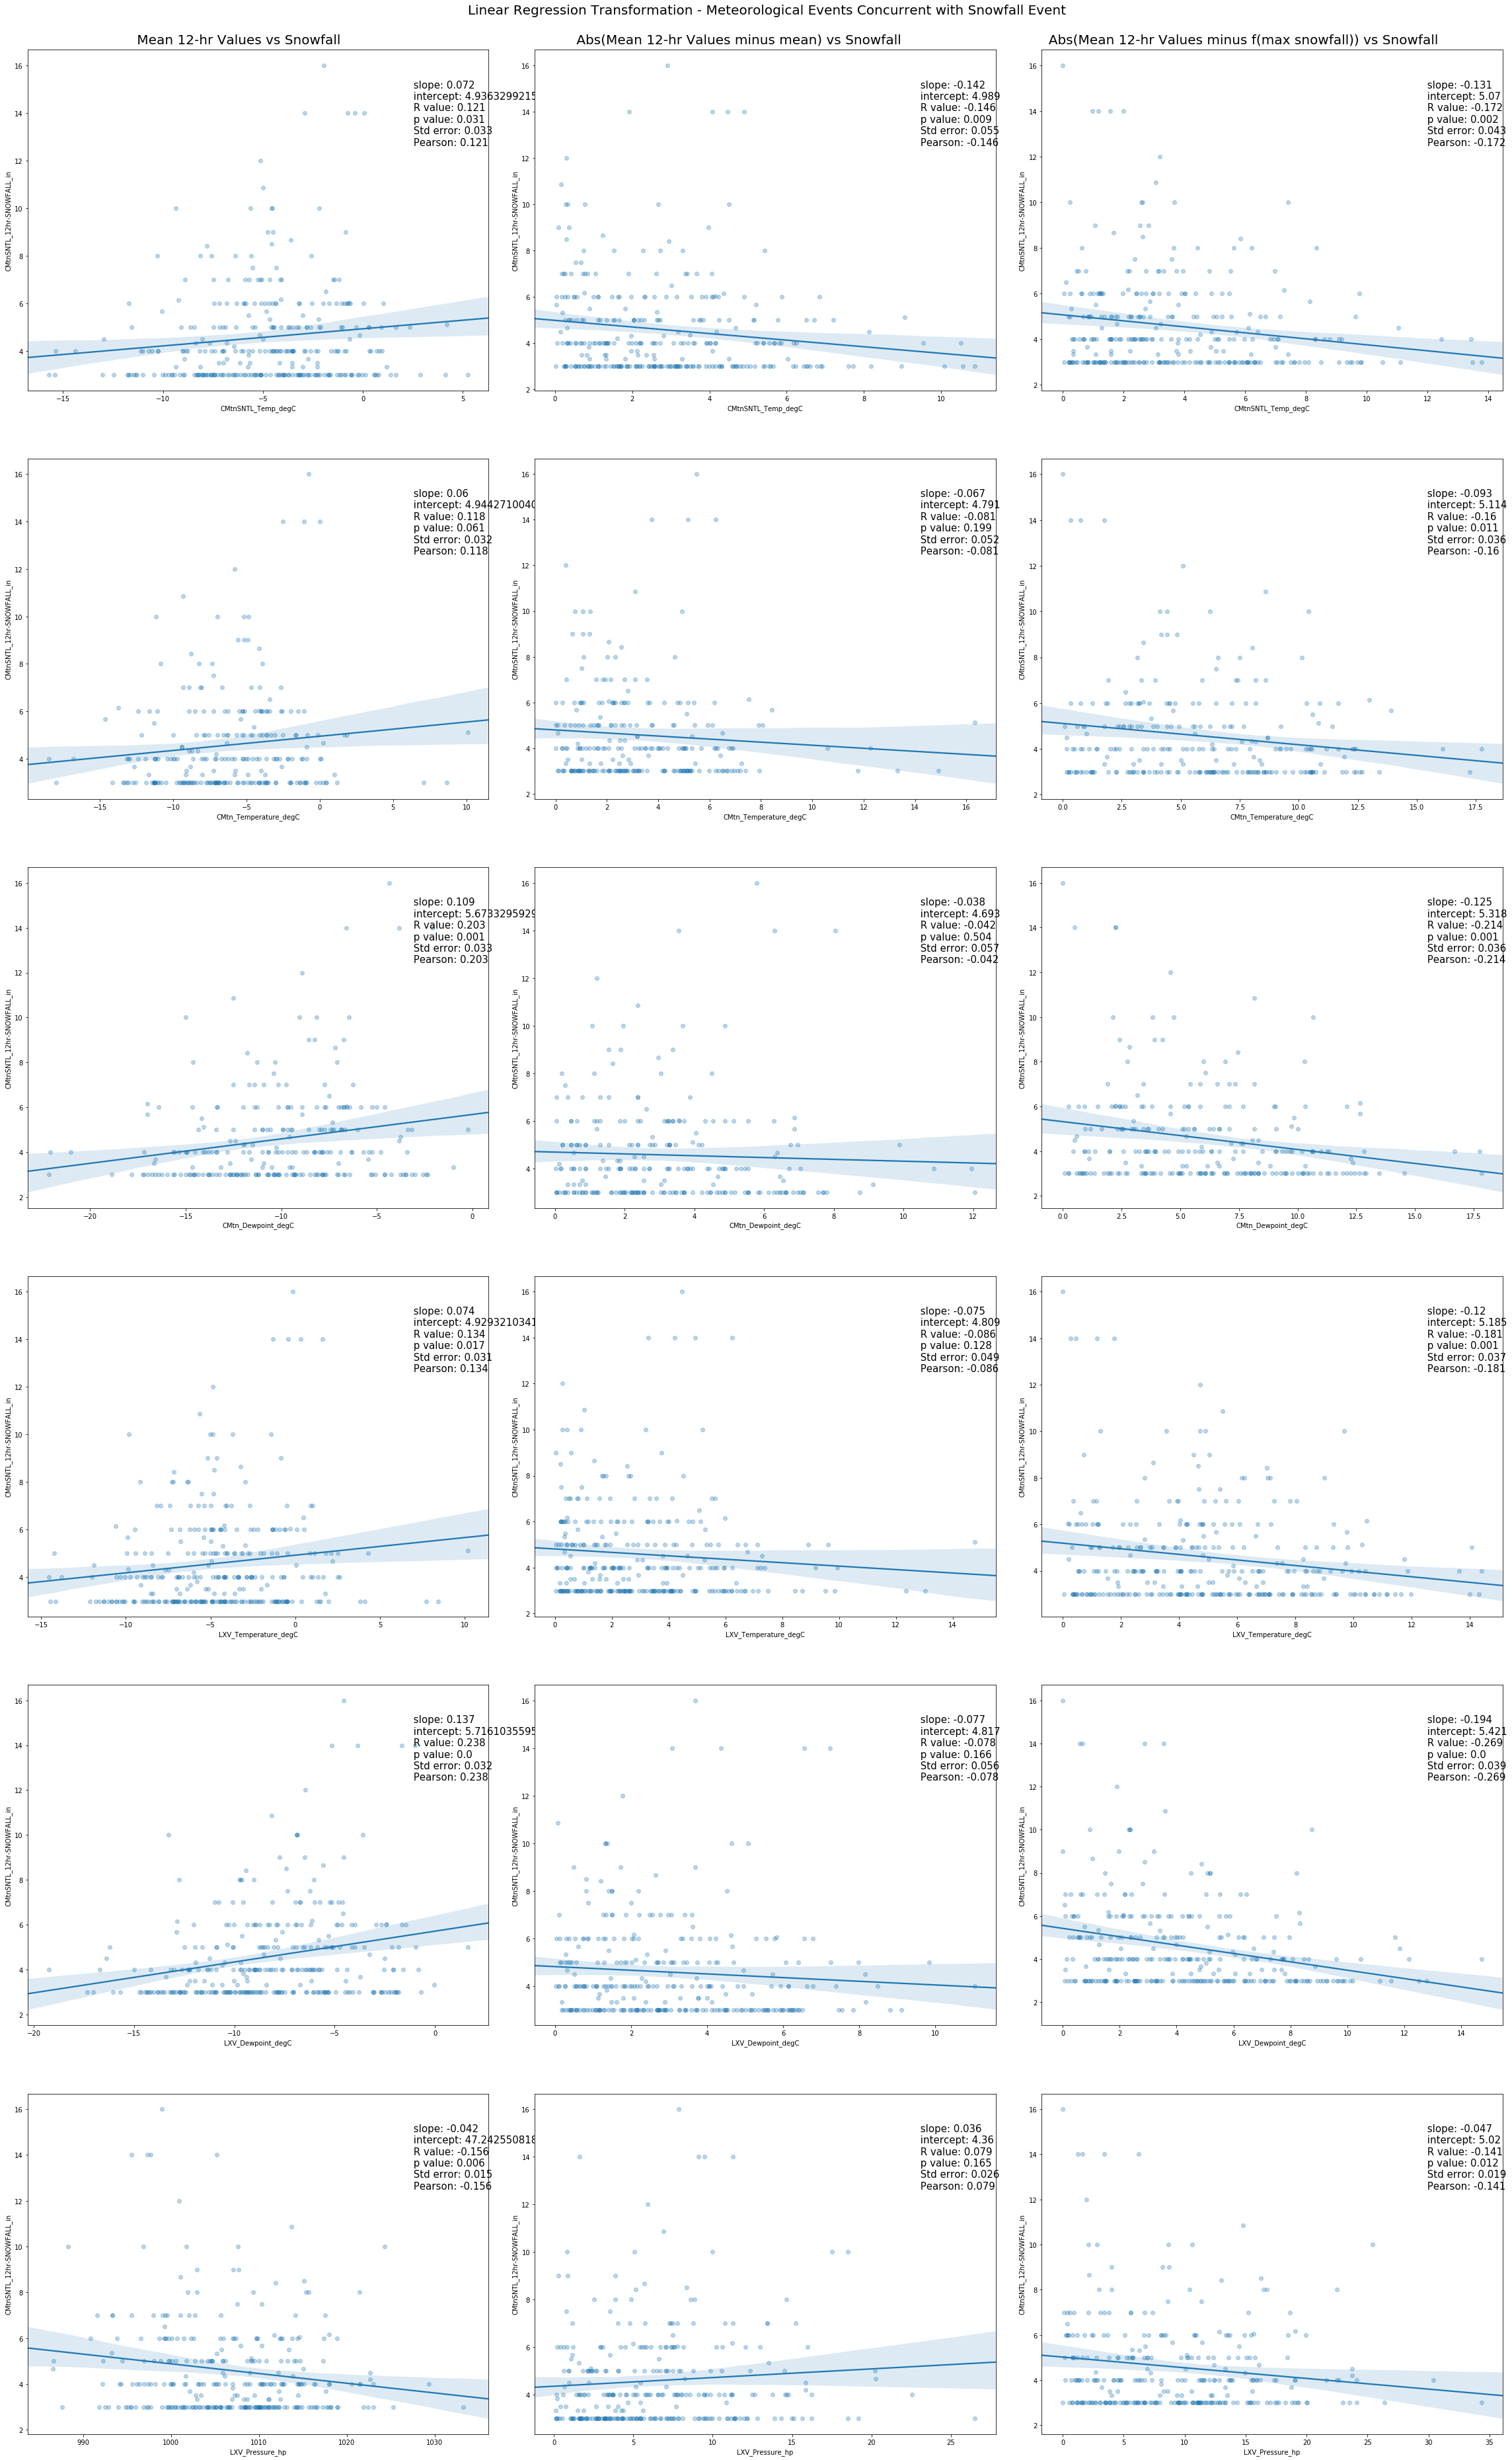

In [7]:
#shift = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']
#abs_diff = abs(asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']-shift)

fig = plt.figure(figsize=(40,120))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n\n %50s %100s %90s" % ("Linear Regression Transformation - Meteorological Events Concurrent with Snowfall Event", "Mean 12-hr Values vs Snowfall" , "Abs(Mean 12-hr Values minus mean) vs Snowfall", "Abs(Mean 12-hr Values minus f(max snowfall)) vs Snowfall") , fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.972)



snf_df = asos_snotel_UA_df['CMtnSNTL_12hr-SNOWFALL_in'].resample('12H').last()
snf_df[snf_df<3] = np.NaN

#yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
#snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

#print(snf_df)




keys = ['CMtnSNTL_Temp_degC',  'CMtn_Temperature_degC', 'CMtn_Dewpoint_degC', 'LXV_Temperature_degC', 'LXV_Dewpoint_degC', 'LXV_Pressure_hp']



#fig = plt.figure(figsize=(70,20))
#fig.suptitle(level, fontsize = 30)    

#keys = ['Temperature_degC']
for k in range(len(keys)):
    
    xx_df = None
    print(keys[k])

    xx_df = asos_snotel_UA_df[keys[k]].resample('12H').mean()
    
    #print(np.isnan(snf_df))
    
    subtra2_df = xx_df[~np.isnan(snf_df)].mean()
    subtra3_df = xx_df.loc[snf_df.idxmax()]
    
    
    
    #yy=  asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmedian()][keys[k]]
    abs_diff1_df = xx_df
    abs_diff2_df = abs(xx_df- subtra2_df)
    abs_diff3_df = abs(xx_df- subtra3_df)##abs(xx_df) - delta2_df
    
        
    #print(abs_diff1_df.dropna())
    
    idx1 = np.isfinite(abs_diff1_df) & np.isfinite(snf_df)
    idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    idx3 = np.isfinite(abs_diff3_df) & np.isfinite(snf_df)
    
    pearson1, pv1 = pearsonr(abs_diff1_df[idx1], snf_df[idx1])
    pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    pearson3, pv3 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(abs_diff1_df[idx1], snf_df[idx1])
    slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])

    
 
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})
      

    plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,13)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+2)
    
    sns.regplot(abs_diff2_df[idx2], snf_df[idx2], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope2,3)) +
                 '\n intercept: ' + str(round(intercept2,3)) + 
                 '\n R value: ' + str(round(r_value2,3)) +  
                 '\n p value: ' + str(round(p_value2,3)) + 
                 '\n Std error: ' + str(round(std_err2,3)) +
                 '\n Pearson: ' + str(round(pearson2,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+3)
    
    sns.regplot(abs_diff3_df[idx3], snf_df[idx3], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope3,3)) +
                 '\n intercept: ' + str(round(intercept3,3)) + 
                 '\n R value: ' + str(round(r_value3,3)) +  
                 '\n p value: ' + str(round(p_value3,3)) + 
                 '\n Std error: ' + str(round(std_err3,3)) +
                 '\n Pearson: ' + str(round(pearson3,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    
    
 
plt.show()


### Linear Regression Transformation - Meteorological Events 12-hr Before Snowfall Event

In [8]:
#shift = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']
#abs_diff = abs(asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']-shift)

fig = plt.figure(figsize=(40,127))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n\n %50s %100s %90s" % ("Linear Regression Transformation - Meteorological Events 12-hrs before Snowfall Event", "Mean 12-hr Values vs Snowfall" , "Abs(Mean 12-hr Values minus mean) vs Snowfall", "Abs(Mean 12-hr Values minus f(max snowfall)) vs Snowfall") , fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.97)



snf_df = asos_snotel_df['12hr-SNOWFALL_in'].resample('12H').last()
snf_df[snf_df<3] = np.NaN

#yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
#snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

#print(snf_df)



keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']

for k in range(len(keys)):
    
    
    xx_df = None
    

    xx_df = asos_snotel_df[keys[k]].shift(+12).resample('12H').mean()
    
    #print(np.isnan(snf_df))
    
    subtra2_df = xx_df[~np.isnan(snf_df)].mean()
    subtra3_df = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()][keys[k]]
    
    
    #yy=  asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmedian()][keys[k]]
    abs_diff1_df = xx_df
    abs_diff2_df = abs(xx_df- subtra2_df)
    abs_diff3_df = abs(xx_df- subtra3_df)##abs(xx_df) - delta2_df
    
    #print(abs_diff1_df.dropna())
    
    idx1 = np.isfinite(abs_diff1_df) & np.isfinite(snf_df)
    idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    idx3 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    
    pearson1, pv1 = pearsonr(abs_diff1_df[idx1], snf_df[idx1])
    pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(abs_diff1_df[idx1], snf_df[idx1])
    slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])

    


   
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})
      

    plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,13)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+2)
    
    sns.regplot(abs_diff2_df[idx2], snf_df[idx2], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope2,3)) +
                 '\n intercept: ' + str(round(intercept2,3)) + 
                 '\n R value: ' + str(round(r_value2,3)) +  
                 '\n p value: ' + str(round(p_value2,3)) + 
                 '\n Std error: ' + str(round(std_err2,3)) +
                 '\n Pearson: ' + str(round(pearson2,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+3)
    
    sns.regplot(abs_diff3_df[idx3], snf_df[idx3], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope3,3)) +
                 '\n intercept: ' + str(round(intercept3,3)) + 
                 '\n R value: ' + str(round(r_value3,3)) +  
                 '\n p value: ' + str(round(p_value3,3)) + 
                 '\n Std error: ' + str(round(std_err3,3)) +
                 '\n Pearson: ' + str(round(pearson3,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    
    
 
plt.show()


NameError: name 'asos_snotel_df' is not defined

<Figure size 2880x9144 with 0 Axes>

### Linear Regression Transformation - Meteorological Events 24-hr Before Snowfall Event

In [ ]:
#shift = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']
#abs_diff = abs(asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()]['TOBS.I-1 (degC) ']-shift)

fig = plt.figure(figsize=(40,127))
fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n\n %50s %100s %90s" % ("Linear Regression Transformation - Meteorological Events 24-hrs before Snowfall Event", "Mean 12-hr Values vs Snowfall" , "Abs(Mean 12-hr Values minus mean) vs Snowfall", "Abs(Mean 12-hr Values minus f(max snowfall)) vs Snowfall") , fontsize = 20)
fig.tight_layout()
fig.tight_layout()
fig.subplots_adjust(top=0.97)



snf_df = asos_snotel_df['12hr-SNOWFALL_in'].resample('12H').last()
snf_df[snf_df<3] = np.NaN

#yy = (asos_snotel_df['12hr-SNOWFALL_in']>=3)
#snf_df = asos_snotel_df['12hr-SNOWFALL_in'][yy]

#print(snf_df)



keys = ['TOBS.I-1 (degC) ','Temperature_degC', 'Dewpoint_degC', 'WindDirection_deg', 'WindSpeed_m/s', 'SNWD.I-1 (in) ', 'LXV_Pressure_hp']

for k in range(len(keys)):
    
    
    xx_df = None
    

    xx_df = asos_snotel_df[keys[k]].shift(+24).resample('12H').mean()
    
    #print(np.isnan(snf_df))
    
    subtra2_df = xx_df[~np.isnan(snf_df)].mean()
    subtra3_df = asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmax()][keys[k]]
    
    
    #yy=  asos_snotel_df.loc[asos_snotel_df['12hr-SNOWFALL_in'].idxmedian()][keys[k]]
    abs_diff1_df = xx_df
    abs_diff2_df = abs(xx_df- subtra2_df)
    abs_diff3_df = abs(xx_df- subtra3_df)##abs(xx_df) - delta2_df
    
    #print(abs_diff1_df.dropna())
    
    idx1 = np.isfinite(abs_diff1_df) & np.isfinite(snf_df)
    idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    idx3 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    
    pearson1, pv1 = pearsonr(abs_diff1_df[idx1], snf_df[idx1])
    pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
    slope1, intercept1, r_value1, p_value1, std_err1 = linregress(abs_diff1_df[idx1], snf_df[idx1])
    slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])

    


   
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})
      

    plt.annotate(' slope: ' + str(round(slope1,3)) +
                 '\n intercept: ' + str(round(intercept1,13)) + 
                 '\n R value: ' + str(round(r_value1,3)) +  
                 '\n p value: ' + str(round(p_value1,3)) + 
                 '\n Std error: ' + str(round(std_err1,3)) +
                 '\n Pearson: ' + str(round(pearson1,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+2)
    
    sns.regplot(abs_diff2_df[idx2], snf_df[idx2], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope2,3)) +
                 '\n intercept: ' + str(round(intercept2,3)) + 
                 '\n R value: ' + str(round(r_value2,3)) +  
                 '\n p value: ' + str(round(p_value2,3)) + 
                 '\n Std error: ' + str(round(std_err2,3)) +
                 '\n Pearson: ' + str(round(pearson2,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    plt.subplot(len(keys)*2,3,3*k+3)
    
    sns.regplot(abs_diff3_df[idx3], snf_df[idx3], scatter_kws={'alpha':0.3})
    
    plt.annotate(' slope: ' + str(round(slope3,3)) +
                 '\n intercept: ' + str(round(intercept3,3)) + 
                 '\n R value: ' + str(round(r_value3,3)) +  
                 '\n p value: ' + str(round(p_value3,3)) + 
                 '\n Std error: ' + str(round(std_err3,3)) +
                 '\n Pearson: ' + str(round(pearson3,3)), \
                 xy=(0.83, 0.72), xycoords='axes fraction', fontsize=15)
    
    
    
 
plt.show()


# Pressure Drops vs Snowfall


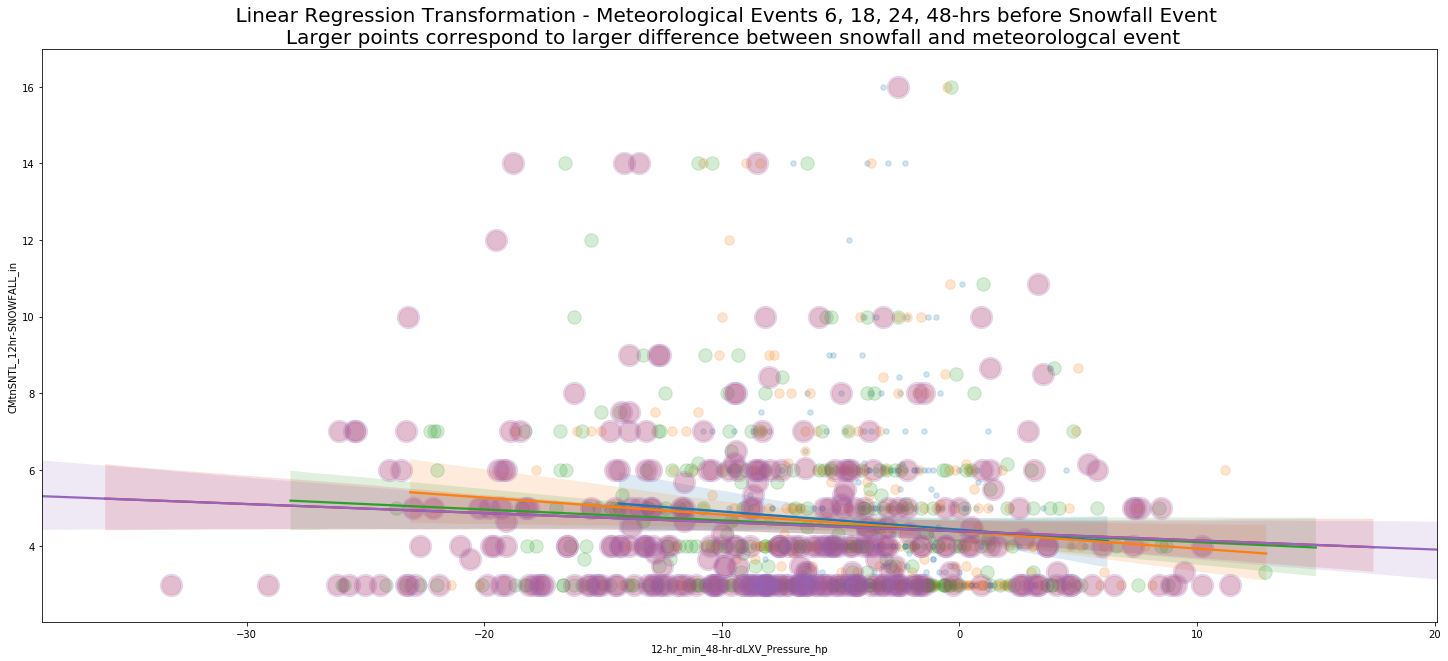

In [14]:


asos_snotel_UA_df['1-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+1)
asos_snotel_UA_df['3-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+3)
asos_snotel_UA_df['6-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+6)
asos_snotel_UA_df['12-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+12)
asos_snotel_UA_df['18-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+18)
asos_snotel_UA_df['24-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+24)
asos_snotel_UA_df['48-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['LXV_Pressure_hp']-asos_snotel_UA_df['LXV_Pressure_hp'].shift(+48)


asos_snotel_UA_df['12-hr_max_1-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['1-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_UA_df['12-hr_min_1-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['1-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_UA_df['12-hr_max_3-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['3-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_UA_df['12-hr_min_3-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['3-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_UA_df['12-hr_max_6-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['6-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_UA_df['12-hr_min_6-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['6-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_UA_df['12-hr_max_12-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['12-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_UA_df['12-hr_min_12-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['12-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_UA_df['12-hr_max_18-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['18-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_UA_df['12-hr_min_18-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['18-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_UA_df['12-hr_max_24-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['24-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_UA_df['12-hr_min_24-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['24-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_UA_df['12-hr_max_48-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['24-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_UA_df['12-hr_min_48-hr-dLXV_Pressure_hp'] = asos_snotel_UA_df['24-hr-dLXV_Pressure_hp'].resample('12H').min()

#print(asos_snotel_df['12-hr_max_1-hr-dLXV_Pressure_hp'].describe())
#print(asos_snotel_df.head())

fig = plt.figure(figsize=(25,10))

fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n %90s" % ("Linear Regression Transformation - Meteorological Events 6, 18, 24, 48-hrs before Snowfall Event", "Larger points correspond to larger difference between snowfall and meteorologcal event") , fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.92)


#ax1 = plt.subplots(1, 1)
idx1 = np.isfinite(asos_snotel_UA_df['12-hr_max_6-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx2= np.isfinite(asos_snotel_UA_df['12-hr_max_12-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx3 = np.isfinite(asos_snotel_UA_df['12-hr_max_18-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx4 = np.isfinite(asos_snotel_UA_df['12-hr_max_24-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx5 = np.isfinite(asos_snotel_UA_df['12-hr_max_48-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
    #idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    #idx3 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    
#pearson1, pv1 = pearsonr(asos_snotel_UA_df['12-hr_max_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1])
   # pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    #pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
#slope1, intercept1, r_value1, p_value1, std_err1 = linregress(asos_snotel_UA_df['12-hr_max_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1])
    #slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    #slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])
ax1 = sns.regplot(asos_snotel_UA_df['12-hr_min_6-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1], scatter_kws={'alpha':0.2, 's':30, "label": "6-hr"})
ax2 = sns.regplot(asos_snotel_UA_df['12-hr_min_12-hr-dLXV_Pressure_hp'][idx2], snf_df[idx2], scatter_kws={'alpha':0.2, 's':90, "label": "12-hr"})
ax3 =  sns.regplot(asos_snotel_UA_df['12-hr_min_18-hr-dLXV_Pressure_hp'][idx3], snf_df[idx3], scatter_kws={'alpha':0.2, 's':180, "label": "18-hr"})
ax4 = sns.regplot(asos_snotel_UA_df['12-hr_min_24-hr-dLXV_Pressure_hp'][idx4], snf_df[idx4], scatter_kws={'alpha':0.2, 's':360, "label": "24-hr"})
ax5 = sns.regplot(asos_snotel_UA_df['12-hr_min_48-hr-dLXV_Pressure_hp'][idx5], snf_df[idx5], scatter_kws={'alpha':0.2, 's':500, "label": "48-hr"})
#sns.regplot(asos_snotel_df['12-hr_min_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1], scatter_kws={'alpha':0.1, })




In [9]:


asos_snotel_df['1-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+1)
asos_snotel_df['3-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+3)
asos_snotel_df['6-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+6)
asos_snotel_df['12-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+12)
asos_snotel_df['18-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+18)
asos_snotel_df['24-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+24)
asos_snotel_df['48-hr-dLXV_Pressure_hp'] = asos_snotel_df['LXV_Pressure_hp']-asos_snotel_df['LXV_Pressure_hp'].shift(+48)


asos_snotel_df['12-hr_max_1-hr-dLXV_Pressure_hp'] = asos_snotel_df['1-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_1-hr-dLXV_Pressure_hp'] = asos_snotel_df['1-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_3-hr-dLXV_Pressure_hp'] = asos_snotel_df['3-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_3-hr-dLXV_Pressure_hp'] = asos_snotel_df['3-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_6-hr-dLXV_Pressure_hp'] = asos_snotel_df['6-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_6-hr-dLXV_Pressure_hp'] = asos_snotel_df['6-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp'] = asos_snotel_df['12-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_12-hr-dLXV_Pressure_hp'] = asos_snotel_df['12-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_18-hr-dLXV_Pressure_hp'] = asos_snotel_df['18-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_18-hr-dLXV_Pressure_hp'] = asos_snotel_df['18-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_24-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_24-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').min()
asos_snotel_df['12-hr_max_48-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').max()
asos_snotel_df['12-hr_min_48-hr-dLXV_Pressure_hp'] = asos_snotel_df['24-hr-dLXV_Pressure_hp'].resample('12H').min()

#print(asos_snotel_df['12-hr_max_1-hr-dLXV_Pressure_hp'].describe())
#print(asos_snotel_df.head())

fig = plt.figure(figsize=(25,10))

fig.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("%100s \n %90s" % ("Linear Regression Transformation - Meteorological Events 6, 18, 24, 48-hrs before Snowfall Event", "Larger points correspond to larger difference between snowfall and meteorologcal event") , fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.92)


#ax1 = plt.subplots(1, 1)
idx1 = np.isfinite(asos_snotel_df['12-hr_max_6-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx2= np.isfinite(asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx3 = np.isfinite(asos_snotel_df['12-hr_max_18-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx4 = np.isfinite(asos_snotel_df['12-hr_max_24-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
idx5 = np.isfinite(asos_snotel_df['12-hr_max_48-hr-dLXV_Pressure_hp']) & np.isfinite(snf_df)
    #idx2 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    #idx3 = np.isfinite(abs_diff2_df) & np.isfinite(snf_df)
    
pearson1, pv1 = pearsonr(asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1])
   # pearson2, pv2 = pearsonr(abs_diff2_df[idx2], snf_df[idx2])
    #pearson3, pv2 = pearsonr(abs_diff3_df[idx3], snf_df[idx3])
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(asos_snotel_df['12-hr_max_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1])
    #slope2, intercept2, r_value2, p_value2, std_err2= linregress(abs_diff2_df[idx2], snf_df[idx2])
    #slope3, intercept3, r_value3, p_value3, std_err3= linregress(abs_diff3_df[idx3], snf_df[idx3])
ax1 = sns.regplot(asos_snotel_df['12-hr_min_6-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1], scatter_kws={'alpha':0.2, 's':30, "label": "6-hr"})
ax1 = sns.regplot(asos_snotel_df['12-hr_min_12-hr-dLXV_Pressure_hp'][idx2], snf_df[idx2], scatter_kws={'alpha':0.2, 's':90, "label": "12-hr"})
ax1 =  sns.regplot(asos_snotel_df['12-hr_min_18-hr-dLXV_Pressure_hp'][idx3], snf_df[idx3], scatter_kws={'alpha':0.2, 's':180, "label": "18-hr"})
ax1 = sns.regplot(asos_snotel_df['12-hr_min_24-hr-dLXV_Pressure_hp'][idx4], snf_df[idx4], scatter_kws={'alpha':0.2, 's':360, "label": "24-hr"})
ax1 = sns.regplot(asos_snotel_df['12-hr_min_48-hr-dLXV_Pressure_hp'][idx5], snf_df[idx5], scatter_kws={'alpha':0.2, 's':500, "label": "48-hr"})
#sns.regplot(asos_snotel_df['12-hr_min_12-hr-dLXV_Pressure_hp'][idx1], snf_df[idx1], scatter_kws={'alpha':0.1, })




NameError: name 'asos_snotel_df' is not defined

In [ ]:
print(asos_snotel_df['12-hr_max_1-hr-dLXV_Pressure_hp'].describe())
print(asos_snotel_df.head())

fig = plt.figure(figsize=(50,10))
asos_snotel_df['1-hr-dLXV_Pressure_hp'].plot(linestyle='None',  marker = ".", markersize = 4, alpha = 0.5)
asos_snotel_df['3-hr-dLXV_Pressure_hp'].plot(linestyle='None',  marker = ".", markersize = 4, alpha = 0.5)

plt.show()

fig = plt.figure(figsize=(50,10))
asos_snotel_df['1-hr-dLXV_Pressure_hp']['01-01-2012':'01-02-2012'].plot(linestyle='None',  marker = ".", markersize = 14, alpha = 0.5)
#asos_snotel_df['3-hr-dLXV_Pressure_hp']['01-01-2012':'01-02-2012'].plot(linestyle='None',  marker = ".", markersize = 14, alpha = 0.5)
asos_snotel_df['LXV_Pressure_hp']['01-01-2012':'01-02-2012'].plot(marker = ".", alpha = 0.5, secondary_y = True)

plt.show()

print(asos_snotel_df.loc[:,['LXV_Pressure_hp','1-hr-dLXV_Pressure_hp']]['12-31-2010':'01-02-2012'])
#print(asos_snotel_df['LXV_Pressure_hp']['01-01-2012':'01-02-2012'], asos_snotel_df['3-hr-dLXV_Pressure_hp']['01-01-2012':'01-02-2012'])



   
    plt.subplot(len(keys)*2,3,3*k+1)
    sns.regplot(abs_diff1_df[idx1], snf_df[idx1], scatter_kws={'alpha':0.3})